In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart.csv

--2023-09-17 02:33:49--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 65.8.84.16, 65.8.84.28, 65.8.84.166, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|65.8.84.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  17.6MB/s    in 1.2s    

2023-09-17 02:33:50 (17.6 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



---

## About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('walmart.csv')

## Defining Problem Statement and Analyzing basic metrics

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [5]:
#Shape of the dataset, i.e no. of rows and columns
df.shape

(550068, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
# Checking data types of the columns
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [8]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [9]:
# Checking for null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Non-Graphical Analysis: Value counts and unique attributes

In [10]:
# Checking value counts of some of the categorical variables Gender, Age-bins, City_Category, Stay_In_Current_City_Years, Marital_Status
for i in [ 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']:
  print(i, ':', df[i].value_counts())
  print("-----------------")

Gender : Gender
M    414259
F    135809
Name: count, dtype: int64
-----------------
Age : Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
-----------------
City_Category : City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
-----------------
Stay_In_Current_City_Years : Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64
-----------------
Marital_Status : Marital_Status
0    324731
1    225337
Name: count, dtype: int64
-----------------


In [11]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [12]:
# Converting categorical attributes to 'category'
dset=df.copy()

cat_columns=['Product_ID','Gender','Age', 'Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
dset[cat_columns] = dset[cat_columns].astype('category')
dset.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

### Summary:

- There are 5891 unique users.
- There are 3631 different types of products.
- Two types of gender with males dominating.
- Only continuous variable is Purchase amount
- 7 age bin categories. 26-35 years of age topping.
- 21 different types of Occupation.
- There are 3 city categories with City B topping the most.
- There are 5 different years of stay - 0,1,2,3,4+
- Two types of Marital Status.
- There are 20 Product Categories.
- There are no null values.

---

### Visual Analysis

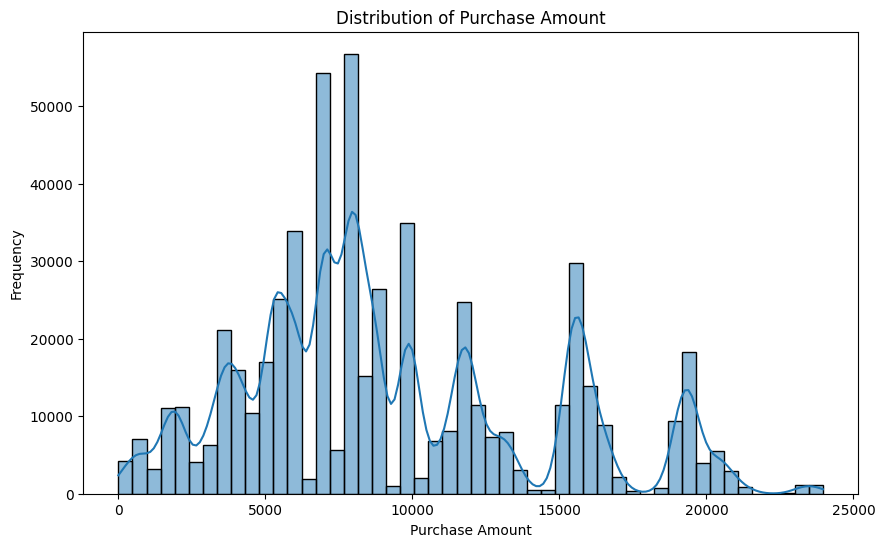

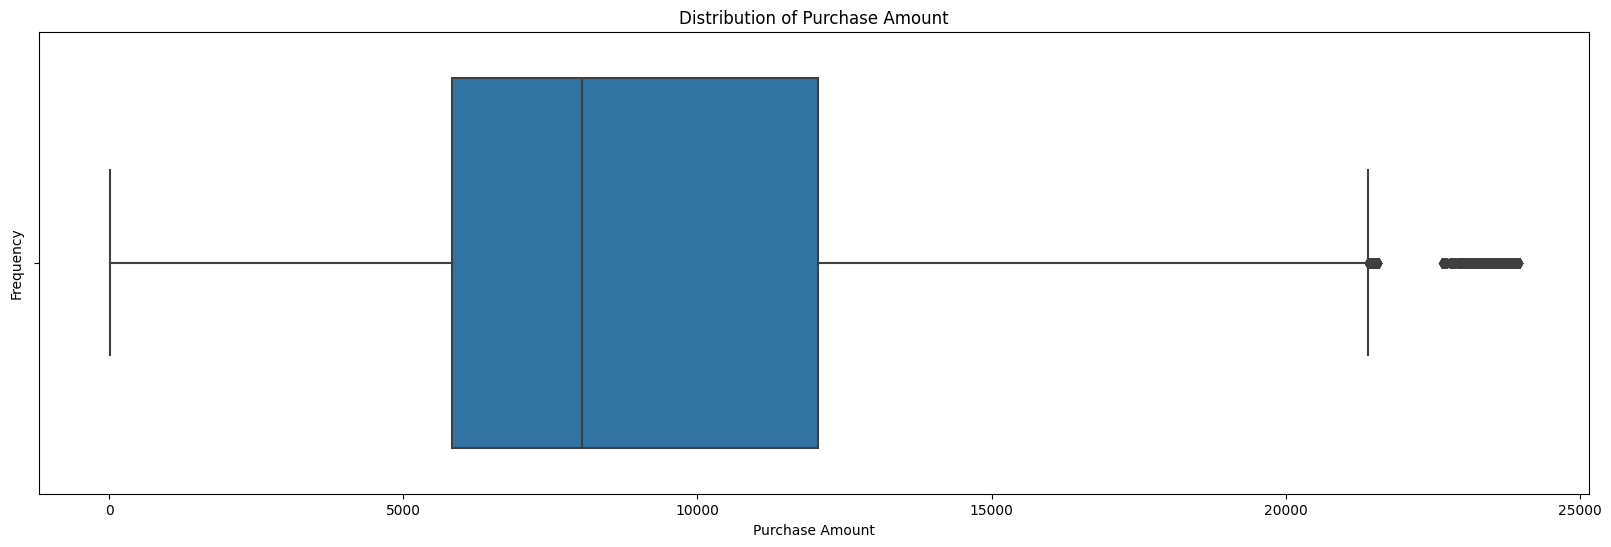

In [13]:
# Distribution of Purchase

plt.figure(figsize=(10,6))
sns.histplot(dset['Purchase'],bins=50, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(20,6))
sns.boxplot(x=dset['Purchase'])
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

#### Observations:
- There are some price points which are higher. This indicates popular price ranges.
- Majority of purchases fall between approx. 5000 - 13000
- The median purchase point is 8047.

---

## Null-values

We have already seen earlier that there are no null values in the dataset. So we need not do any imputation of the data.

### Outliers
Only continous variable is the 'Purchase' column. Considering the above box plot for Purchase
### Observations:
- The distribution is right-skewed.
- There are outliers for the Purchase column. Considering this is a Black Friday sale dataset, these outliers could be valid as there could be some customers who would have spent more as many products were for sale. These outliers can also indicate the buying patterns of the customers.
- Currently we'll not treat these outliers, for our calculation and analysis. Later, we'll treat them and see.

---

### Countplots of categorical variables

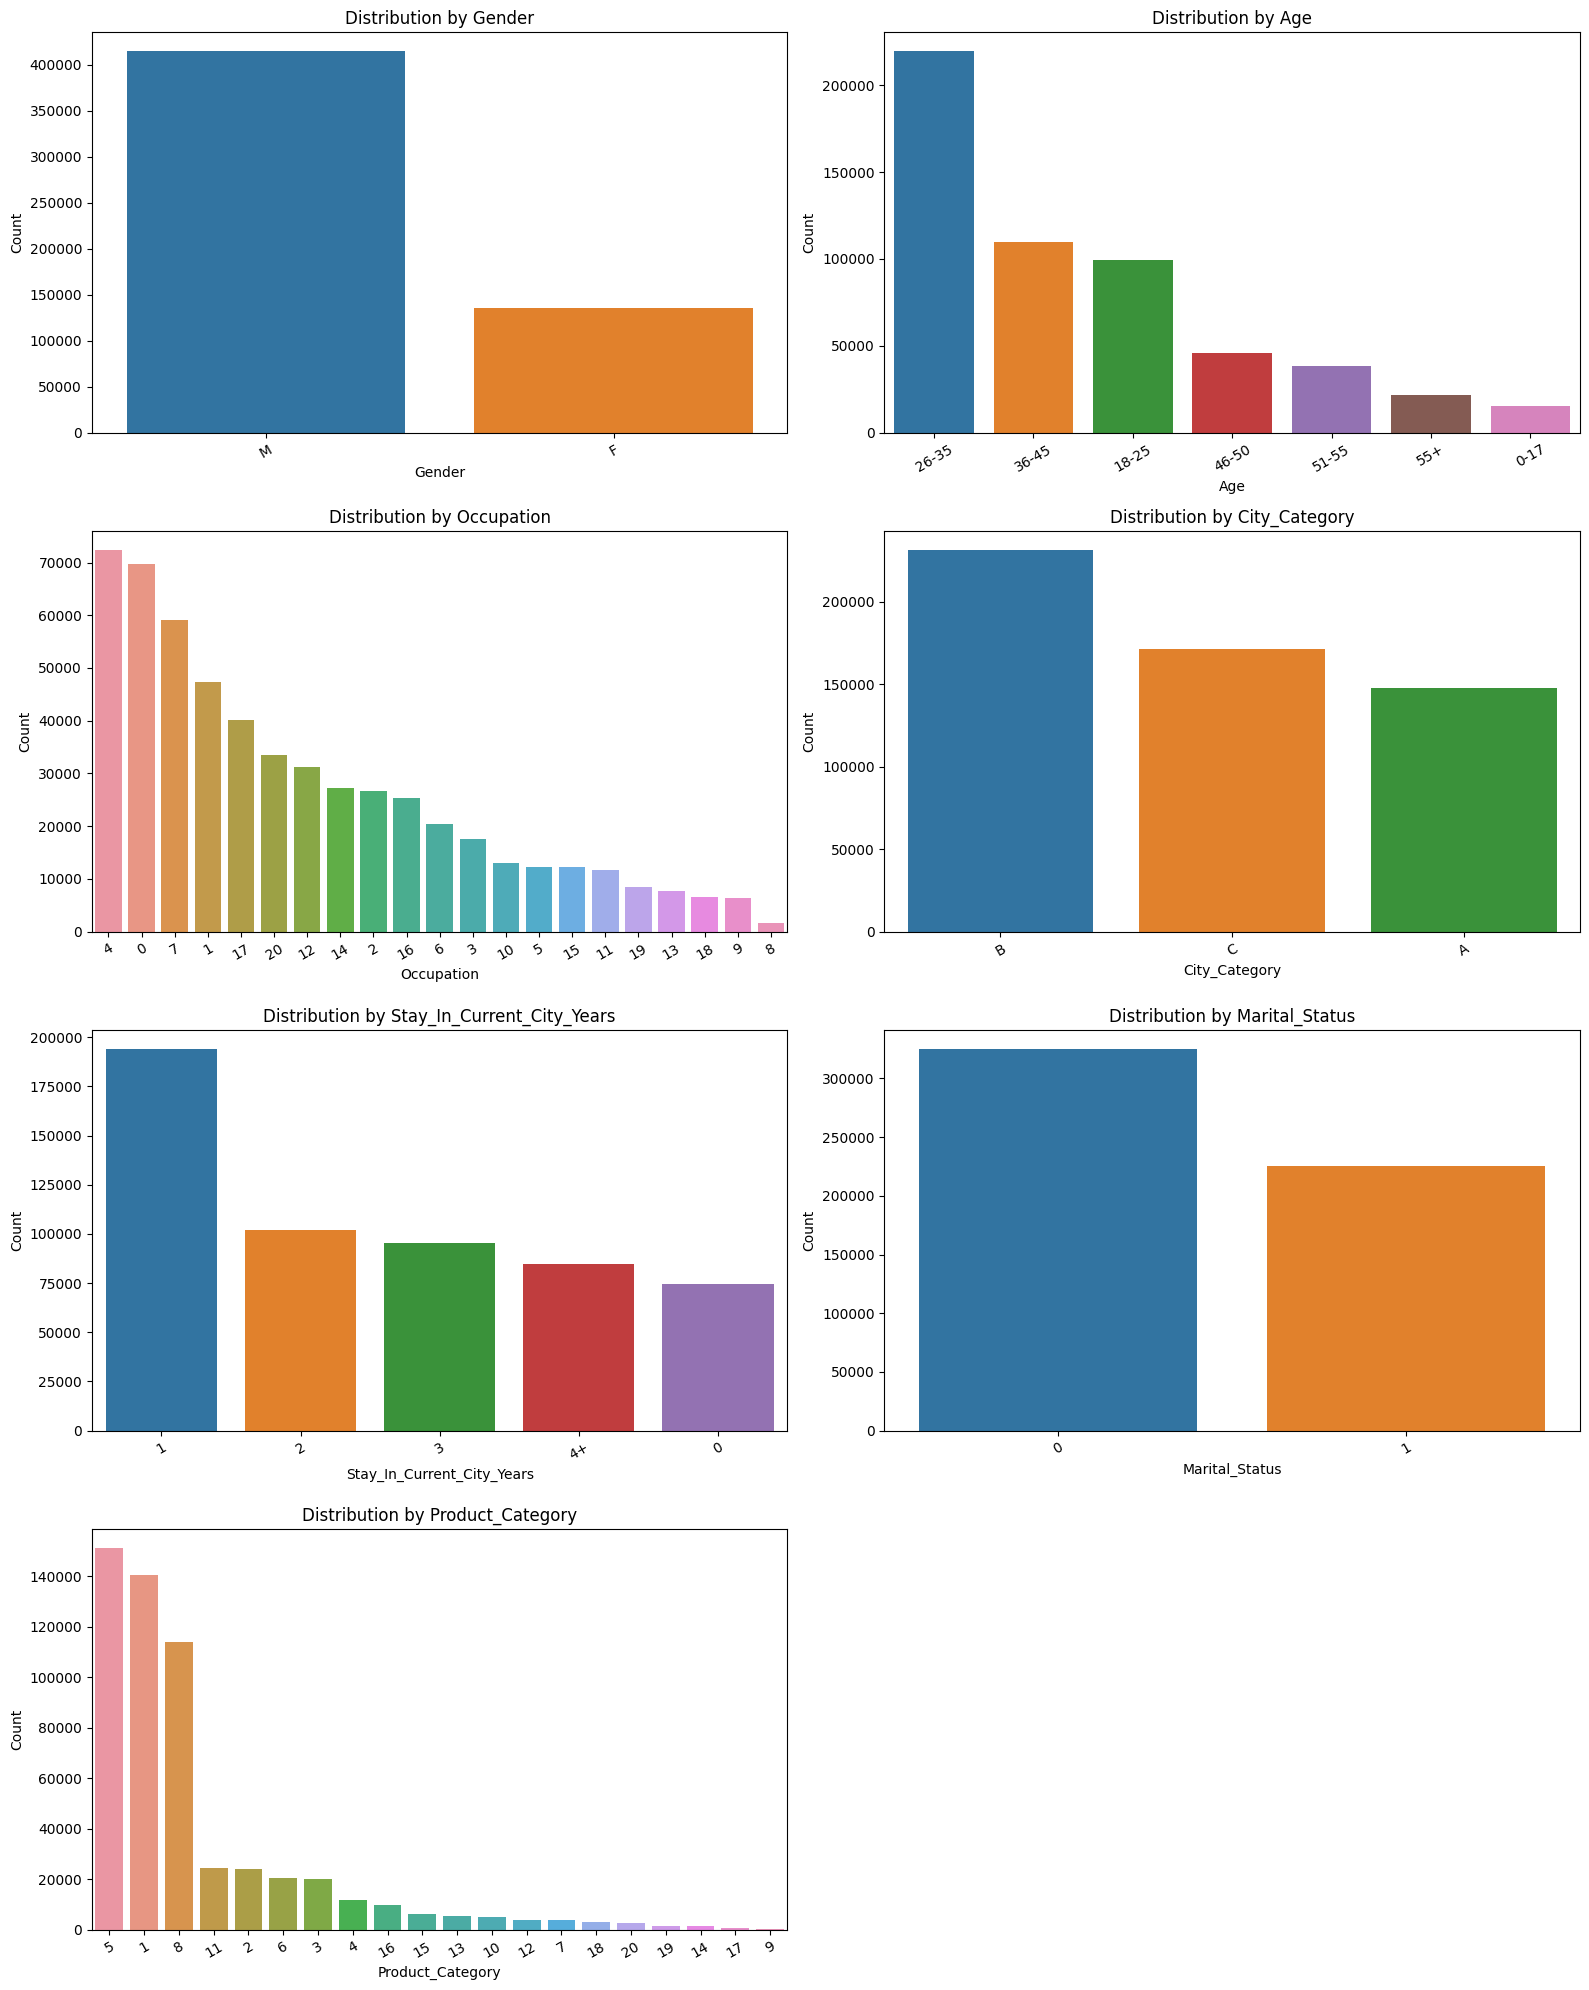

In [14]:
cont_vars = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
for i, var in enumerate(cont_vars):
  ax = axes[i // 2, i % 2]  
  sns.countplot(data=dset, x=var, ax=ax, order=dset[var].value_counts(normalize=True).index)
  ax.set_title(f'Distribution by {var}')
  ax.set_ylabel('Count')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()

### Observations:
- Distribution of male is significantly higher than female customers.
- Most number of customers belong to age group 26-35, followed by "36-45" and "18-25" age groups. Customers who belong to age groups 55+ and 0-17 are the least.
- Customers who work as 4, 0 and 7 constitute the majority of customer base for Walmart. Customers with job 8 is the least.
- Most customers live in the City B follwed by C and A.
- Many customers have lived in the city for only one year. We can customers who are relatively new to the city are more, ignoring those who have lived only for a few months.
- A lot of unmarried customers than married customers.
- Product category with 5, 1 and 8 are the most sold items from Walmart and categories such as 20,19,14,17 and 9 are the least sold.

---

### Coorelation

Since Purchase is the only continuous column, plotting a heatmap doesn't make a lot of sense here.

---

### Bivariate Analysis

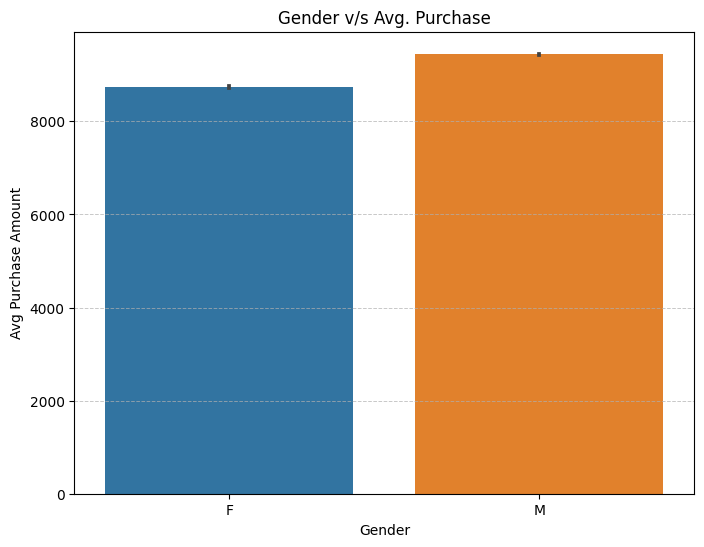

In [15]:
# Gender v/s Avg Purchase
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Purchase', data=dset)
plt.title('Gender v/s Avg. Purchase')
plt.ylabel('Avg Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- Male customers spend slightly more than female customers during the sale.
- Given that there are more males than females and also their expenditure is higher, finding out the buying patterns and preferences of this demographic would be helpful.

---

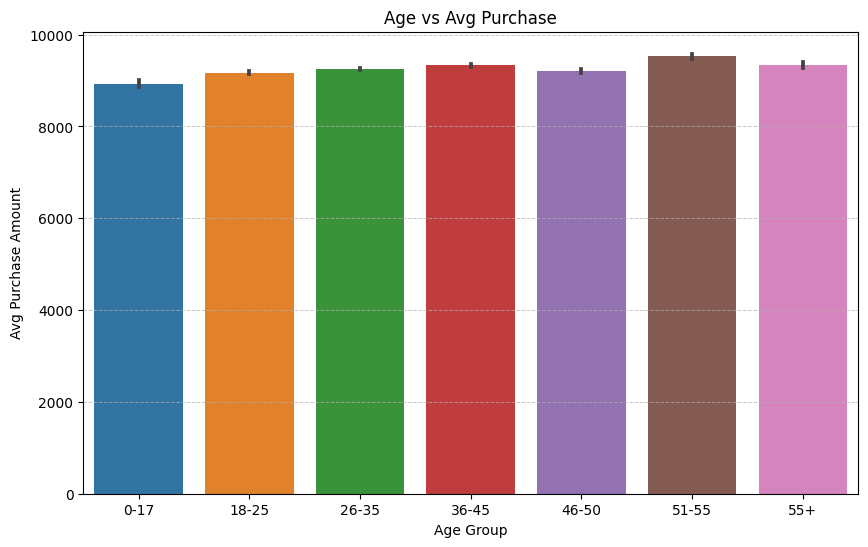

In [16]:
# Age v/s Avg. Purchase
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Purchase', data=dset, order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Age vs Avg Purchase')
plt.xlabel('Age Group')
plt.ylabel('Avg Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- The age groups 51-55 and 36-45 seems to have the highest avg purchase amount.
- The other age groups also display considerable purchasing power.
- 0-17 age group has the least avg purchase amount but they are not very far off from the maximum average.

---

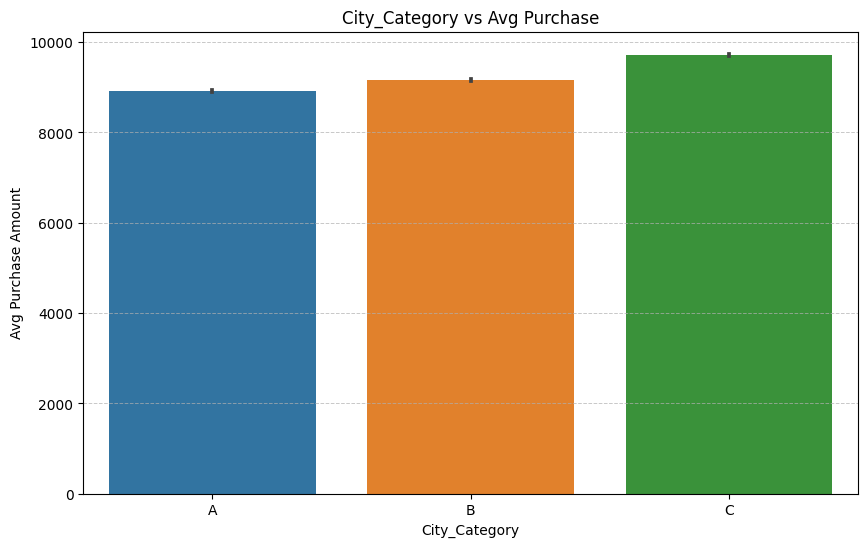

In [17]:
# City Category v/s Avg Purchase
plt.figure(figsize=(10,6))
sns.barplot(x='City_Category', y='Purchase', data=dset)
plt.title('City_Category vs Avg Purchase')
plt.xlabel('City_Category')
plt.ylabel('Avg Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- Customers from city C spends the most during the sale, follwed by customers from B and A cities.
- Customers from the city C has either higher purchasing power or preference for expensive products.


---

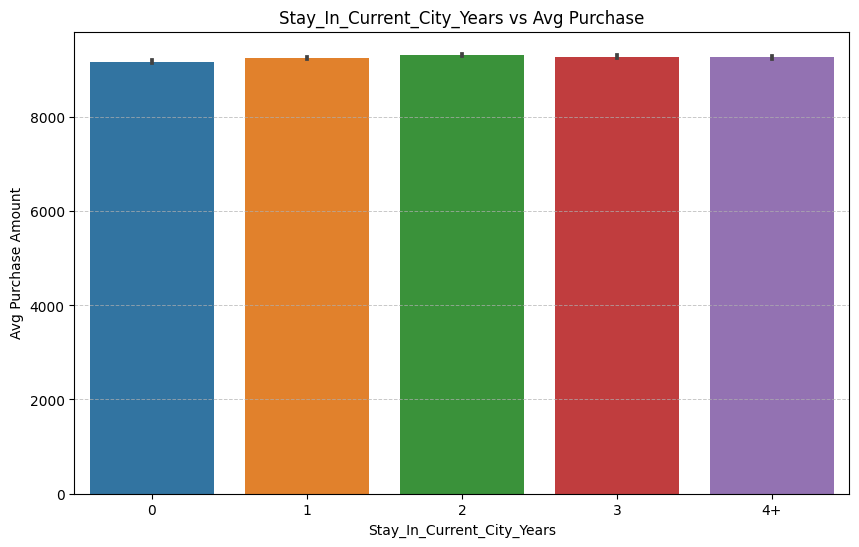

In [18]:
# Stay_In_Current_City_Years v/s Avg Purchase
plt.figure(figsize=(10,6))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=dset)
plt.title('Stay_In_Current_City_Years vs Avg Purchase')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Avg Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- The average purchase amount appears to remain consistent across all groups, irrespective of the duration of their stay in their respective cities.
- The number of years of stay in their respective city does not affect their spending behavior which indicates a stable customer base.
- There is a very slight dip for the new residents in the city probably they're just settling down and have not explored yet.

---

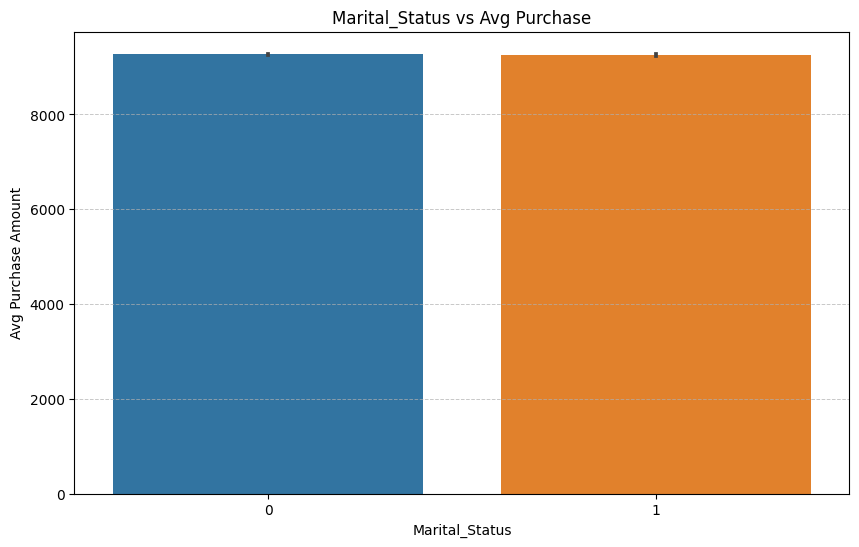

In [19]:
# Marital Status v/s Avg. Purchase

plt.figure(figsize=(10,6))
sns.barplot(x='Marital_Status', y='Purchase', data=dset)
plt.title('Marital_Status vs Avg Purchase')
plt.xlabel('Marital_Status')
plt.ylabel('Avg Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- The marital status doesn't seem to influence any purchasing behavior.
- This is probably because people, regardless of their marital status during Black Friday sales spend similiarly buying gifts for their family or friends.

---

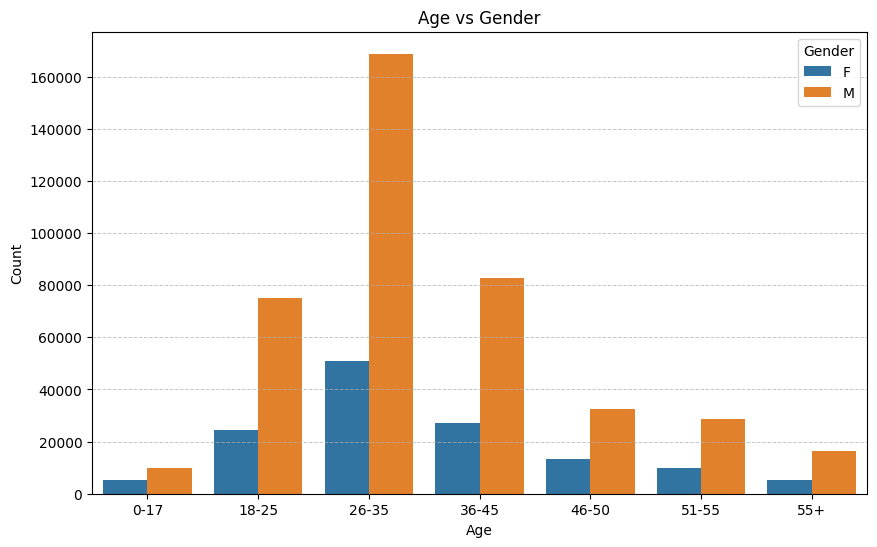

In [20]:
# Gender v/s Age

plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Gender', data=dset,order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Age vs Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- The age group 26-35 for both the genders has the highest number of customers, followed by 36-45 and 18-25 age groups.
- The 0-17 age group is least probably because of the lower purchasing power of the individuals.
- In all age groups, males spend more than females.

---

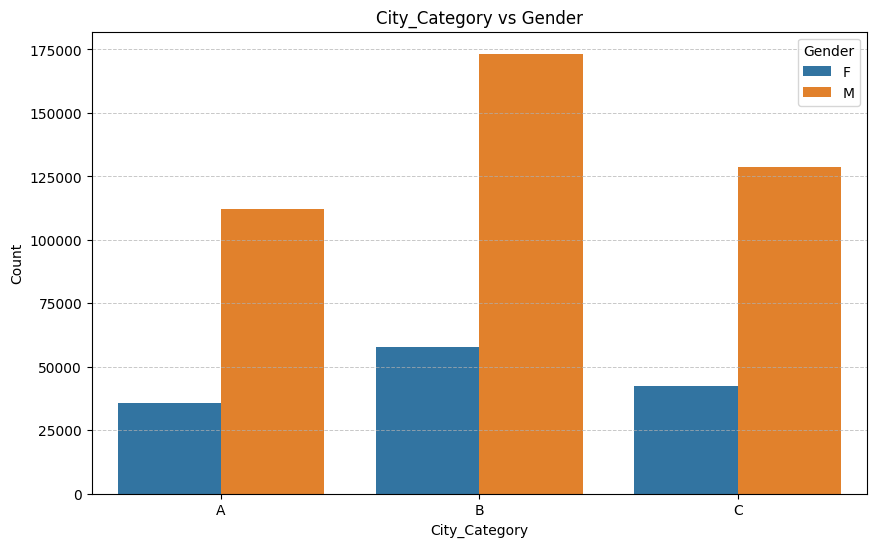

In [21]:
# Gender v/s City_Category

plt.figure(figsize=(10,6))
sns.countplot(x='City_Category', hue='Gender', data=dset)
plt.title('City_Category vs Gender')
plt.xlabel('City_Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- There are more males than femaltes in all the cities in the ratio close to 3:1
- City B has the most male and female customers and this city can be a crucial market for business.
- Although males outnumber females in all the cities, with the right marketing approach, there is some potential to attract more female shoppers.

---

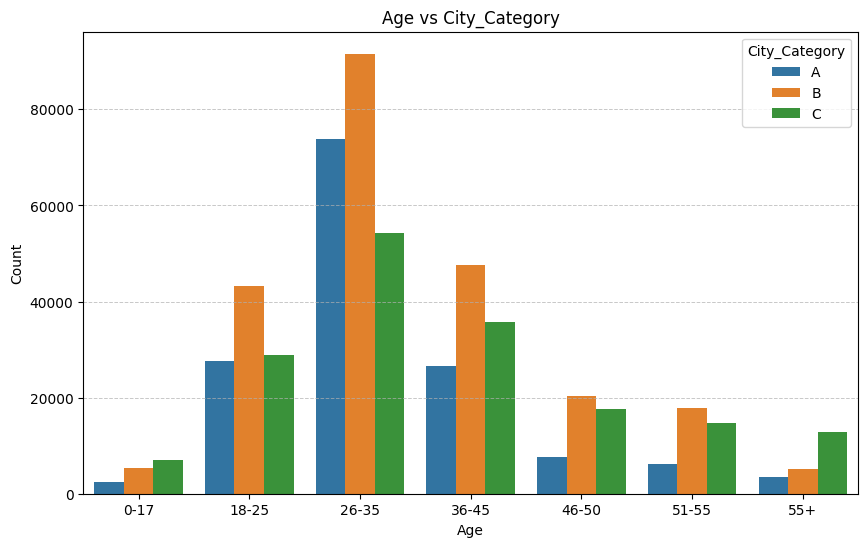

In [22]:
# Age v/s City_Category

plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='City_Category', data=dset,order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Age vs City_Category')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- Age group 26-35 is the highest across all the cities.
- City B seems to be the most popular across all age groups except 0-17 and 55+ where City C has the highest count.
- This chart can be considered to target the customers in their respective age brackets as per the City Category.
- City A is popular amongst the age group 18-25 and 26-35 after City B.
- As customers age from 35, they tend to stay in City C. This could possibly because city C could be calmer and not crowded.
---

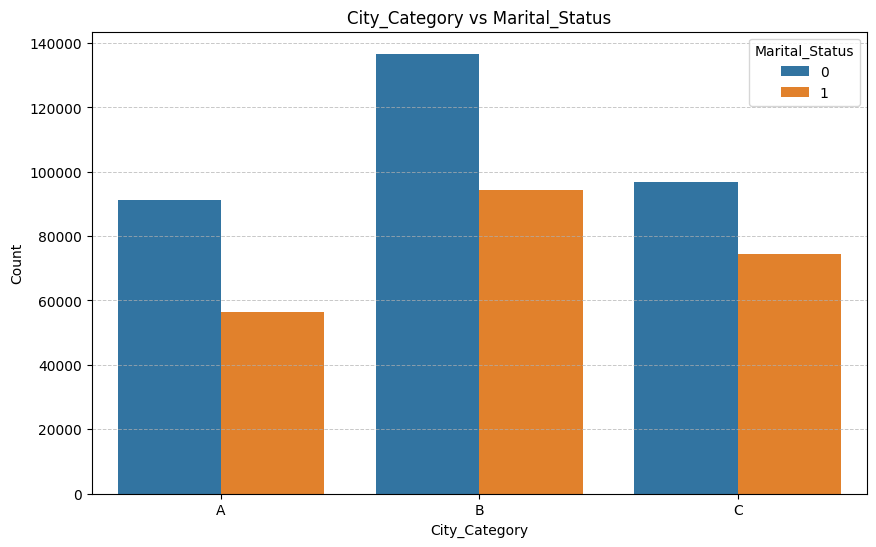

In [23]:
# Marital Status v/s City_Category

dset['Marital_Status'] = dset['Marital_Status'].astype(str)

plt.figure(figsize=(10,6))
sns.countplot(x='City_Category', hue='Marital_Status', data=dset)
plt.title('City_Category vs Marital_Status')
plt.xlabel('City_Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- All the cities have more unmarried customers than the married shoppers.
- Most hail from the City B followed by the City C and A.

---

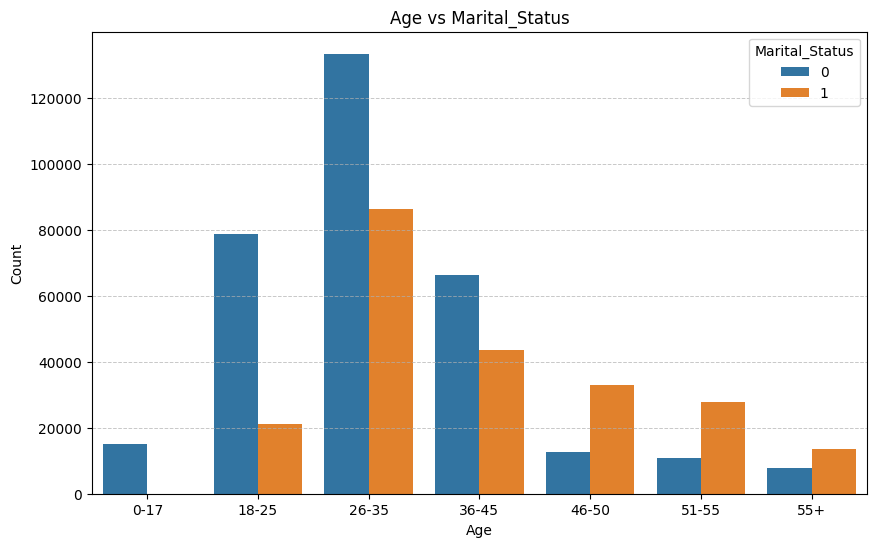

In [24]:
# Marital Status v/s Age

plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Marital_Status', data=dset, order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Age vs Marital_Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- Predictably, as age increases, lot of customers are married.
- We see married customers outnumber unmarried in the age groups 46-50, 51-55 and 55+.
- Unmarried customers dominate in the age groups 18-25, 26-35 and 36-45.
- Obviously in the age group 0-17, there are 0 unmarried customers.
- This chart will help to make better strategies when marketing products to customers based on their marital status.
---

In [25]:
top10_jobs = dset['Occupation'].value_counts()
top10_jobs

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

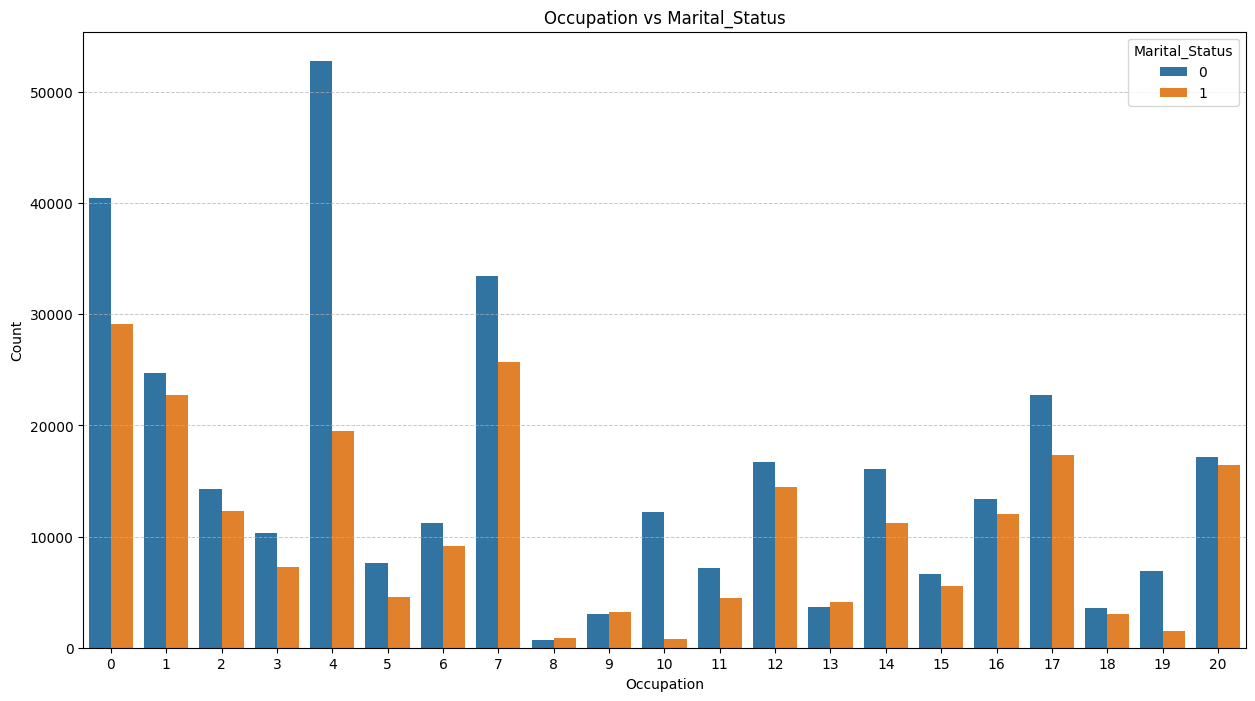

In [26]:
# Occupation v/s Marital Status

plt.figure(figsize=(15,8))
sns.countplot(x='Occupation', hue='Marital_Status', data=dset)
plt.title('Occupation vs Marital_Status')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- No. of unmarried customers is more than married customers in almost all the job categories and by a considerable margin in the category 0, 4, 10, 19 and in job 8, 9, and 13 married have exceeded the count by a slight margin.
- The count is almost same in the categories 1, 2, 16, 18 and 20.
- Among unmarried customers, job category 4 seems to be the most popular, followed by 0 and 7.
- Among married customers, job category 0 seems to be popular followed by 7 and 1

---

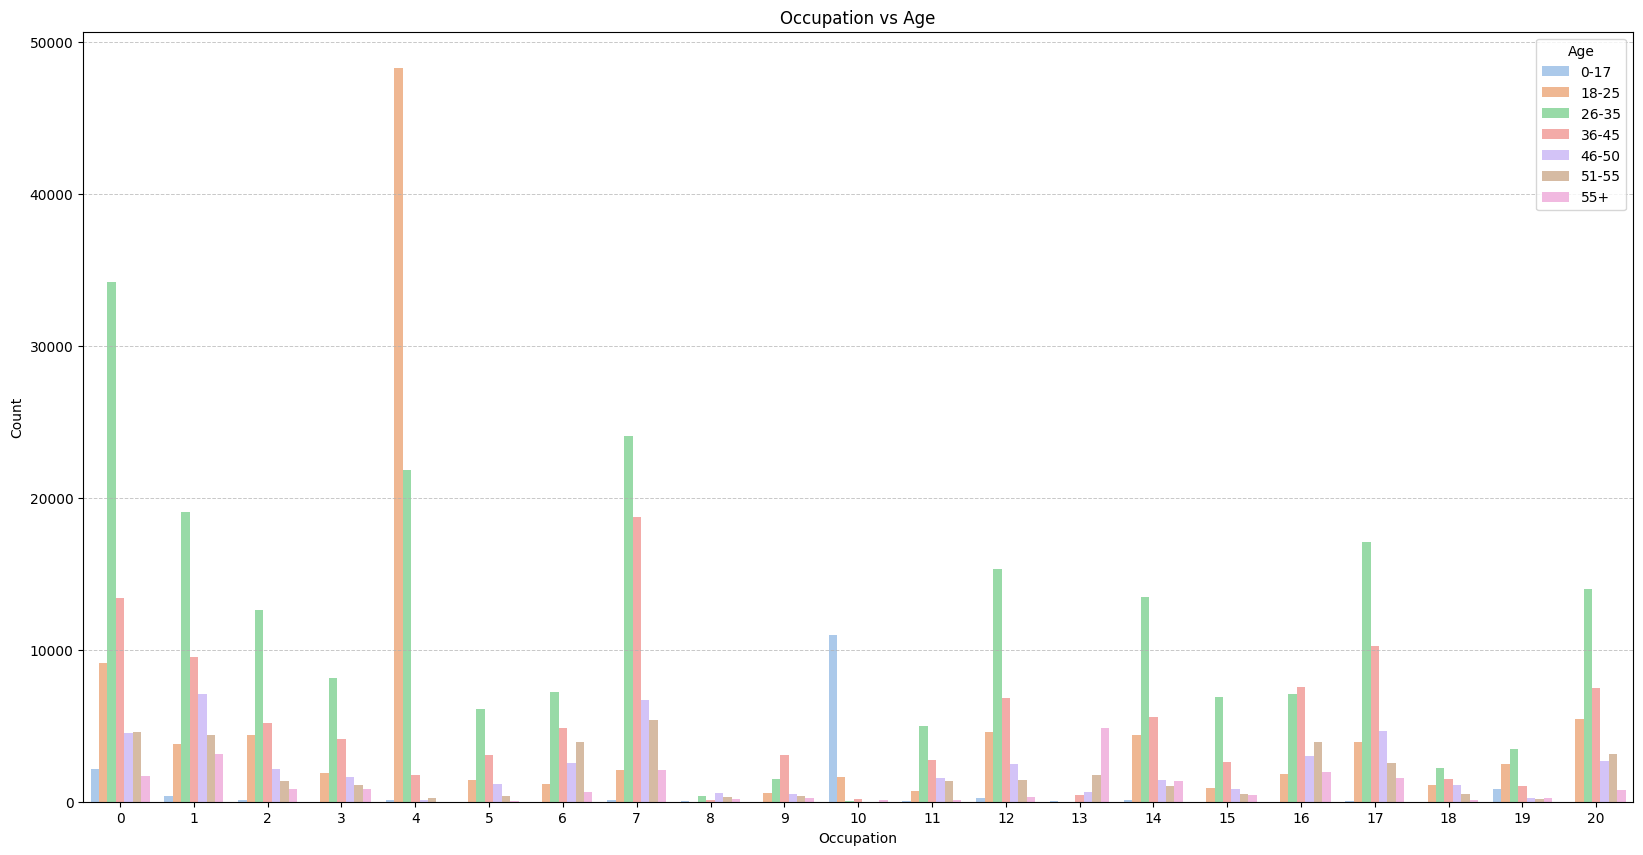

In [27]:
# Occupation v/s Age-group

plt.figure(figsize=(20,10))
sns.countplot(x='Occupation', hue='Age', data=dset, hue_order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], palette='pastel')
plt.title('Occupation vs Age')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()


For the age group
1. 0 - 17:
    - Job 10 seems to be the popular followed by 0 and 19.
    - Customers under this age bracket do not have the luxury of working anywhere.
    - We see that job 10 is mostly by this age group.
2. 18 - 25:
    - Job 4 seems to be most popular, followed by 0 and 3
3. 26 - 35:
    - As expected, this age group domainates in most job categories.
    - Tops in the job category 0, 7, 4, 1 which are some of the top 10 occupations.
4. 36 - 45:
    - The job categories 7, 0, and 1 seem to be common jobs.
    - In job 16, this age group seem be dominating.
5. 46 - 50:
    - Jobs 1, 0 and 7 seem to common ones among this group.
6. 51 - 55:
    - Jobs 7, 0, 1, 6
7. 55+:
    - Although this age-group is present in most of the job categories, they seem to dominate in the category 13.
 
- Job 8, 9, 18 and 19 
- With the above observations, we can make better recommendations of the products to the customers. Let's say, if the customer is under 0 - 17, we can recommend products that are popular for the category 10.
- Similiarly, for all the age groups, there are some popular job categories. Walmart can make better informed decisions based on the customer's age and profession.

---

In [28]:
top10_prods = dset['Product_Category'].value_counts().head(10)
top10_prods

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
Name: count, dtype: int64

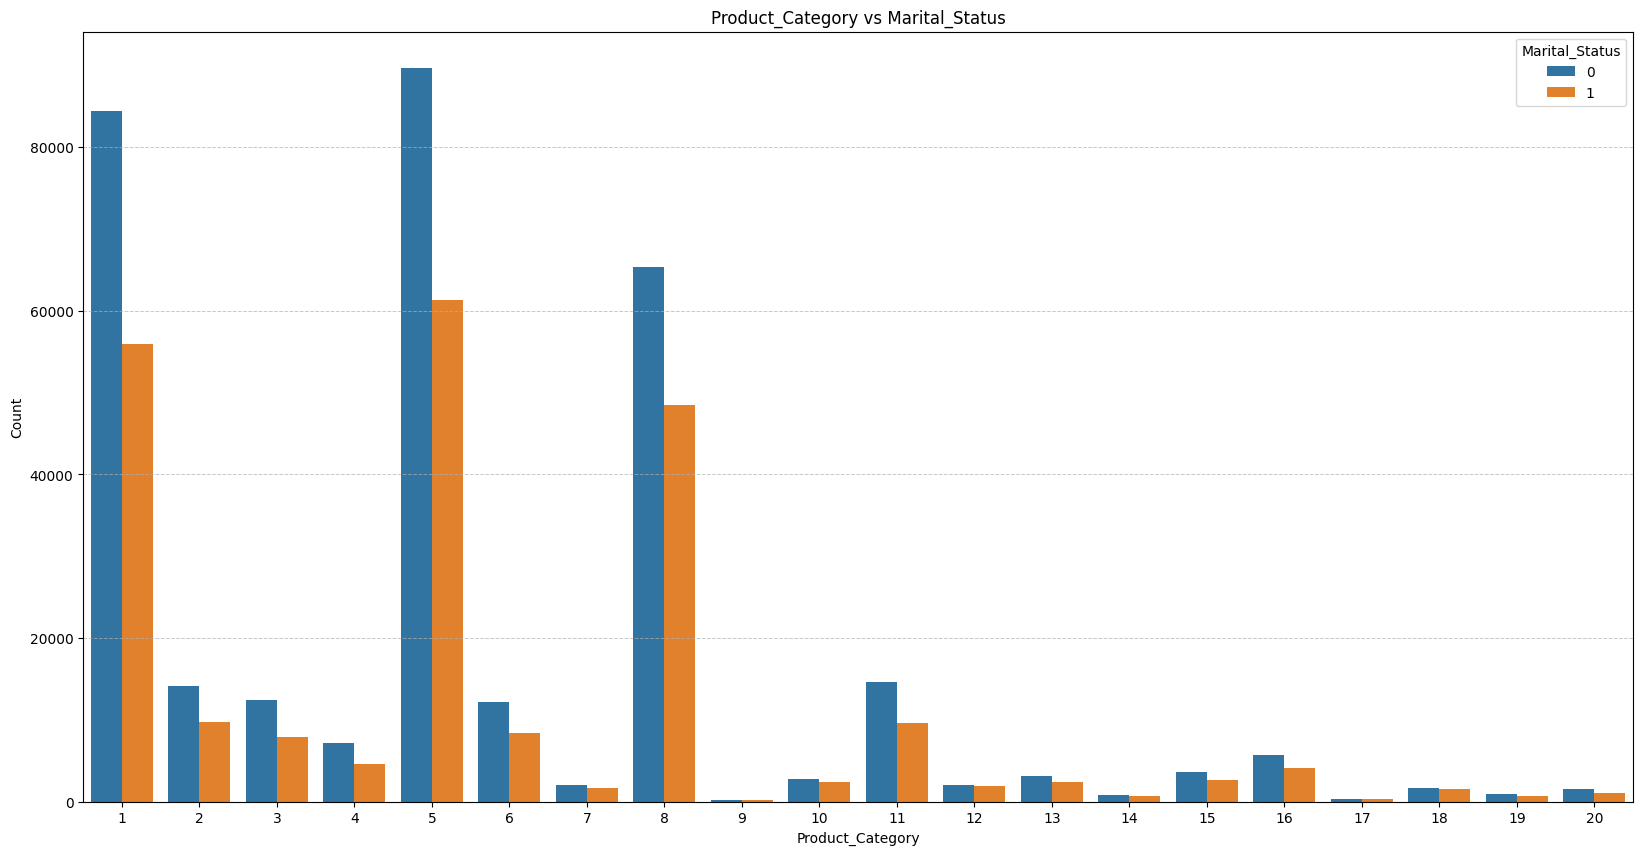

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x='Product_Category', hue='Marital_Status', data=dset)
plt.title('Product_Category vs Marital_Status')
plt.xlabel('Product_Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- Product categories 5, 1 and 8 are the most common among both married and unmarried customers.
- All product categories are preferred more by the unmarried customers than the married.
- Least preferred product categories are 9, 14, 17 and 19.

---

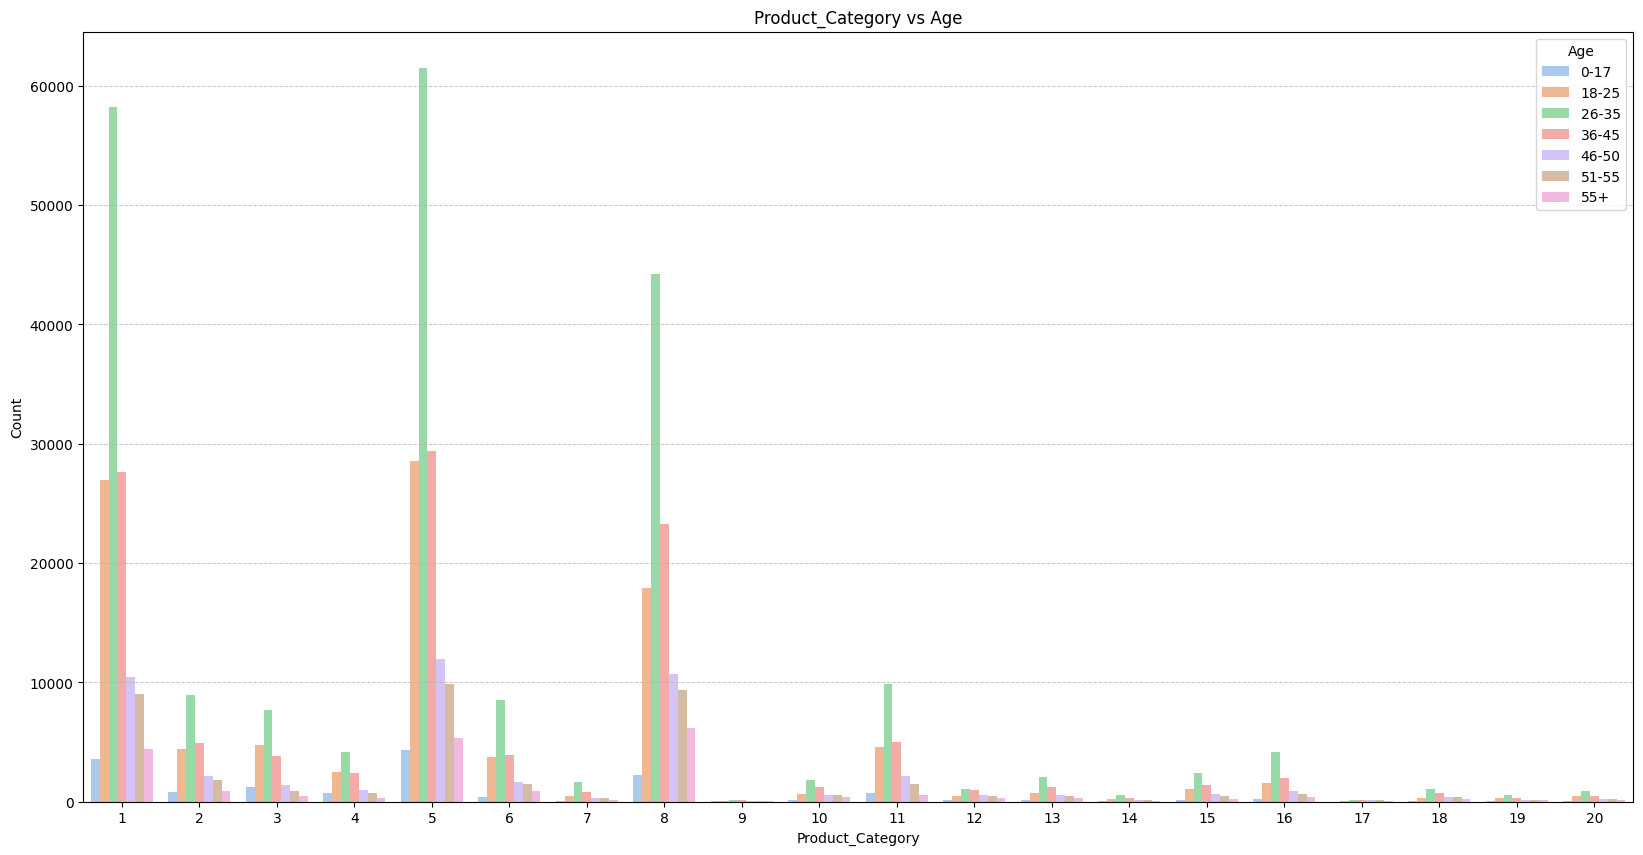

In [30]:
# Product Category v/s Age
plt.figure(figsize=(20,10))
sns.countplot(x='Product_Category', hue='Age', data=dset, hue_order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],palette='pastel')
plt.title('Product_Category vs Age')
plt.xlabel('Product_Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

For the age group
1. 0 - 17:
    - Product categories 5, 1, 8 and 3 seems to be the popular choices amongst this age group.
2. 18 - 25:
    - Product categories 5, 1, 8 are the popular choices for this age group as well.
3. 26 - 3
    - Customers belonging to this age bracket also prefer 5, 1 and 8 in the same order.
4. 36 - 45:
    - Customers belonging to this age bracket also prefer 5, 1 and 8 in the same order.
5. 46 - 50:
    - Customers belonging to this age bracket also prefer 5, 1 and 8 in the same order.
6. 51 - 55:
    - These customers prefer 5, 8 and 1 in the same order.
7. 55+:
    - These customers prefer 8, 5 and 1.
  
- In all the product categories, most are bought by the age group 26-35, followed by the group 36-45 and 18-25.
- Here as well, we notice the product categories 9, 14 and 17 are the least preferred. This could possibly because these are new products and are not marketed well.
- We do not see any particular anamolies and product preferences by the age-groups are consistent across all categories.

---

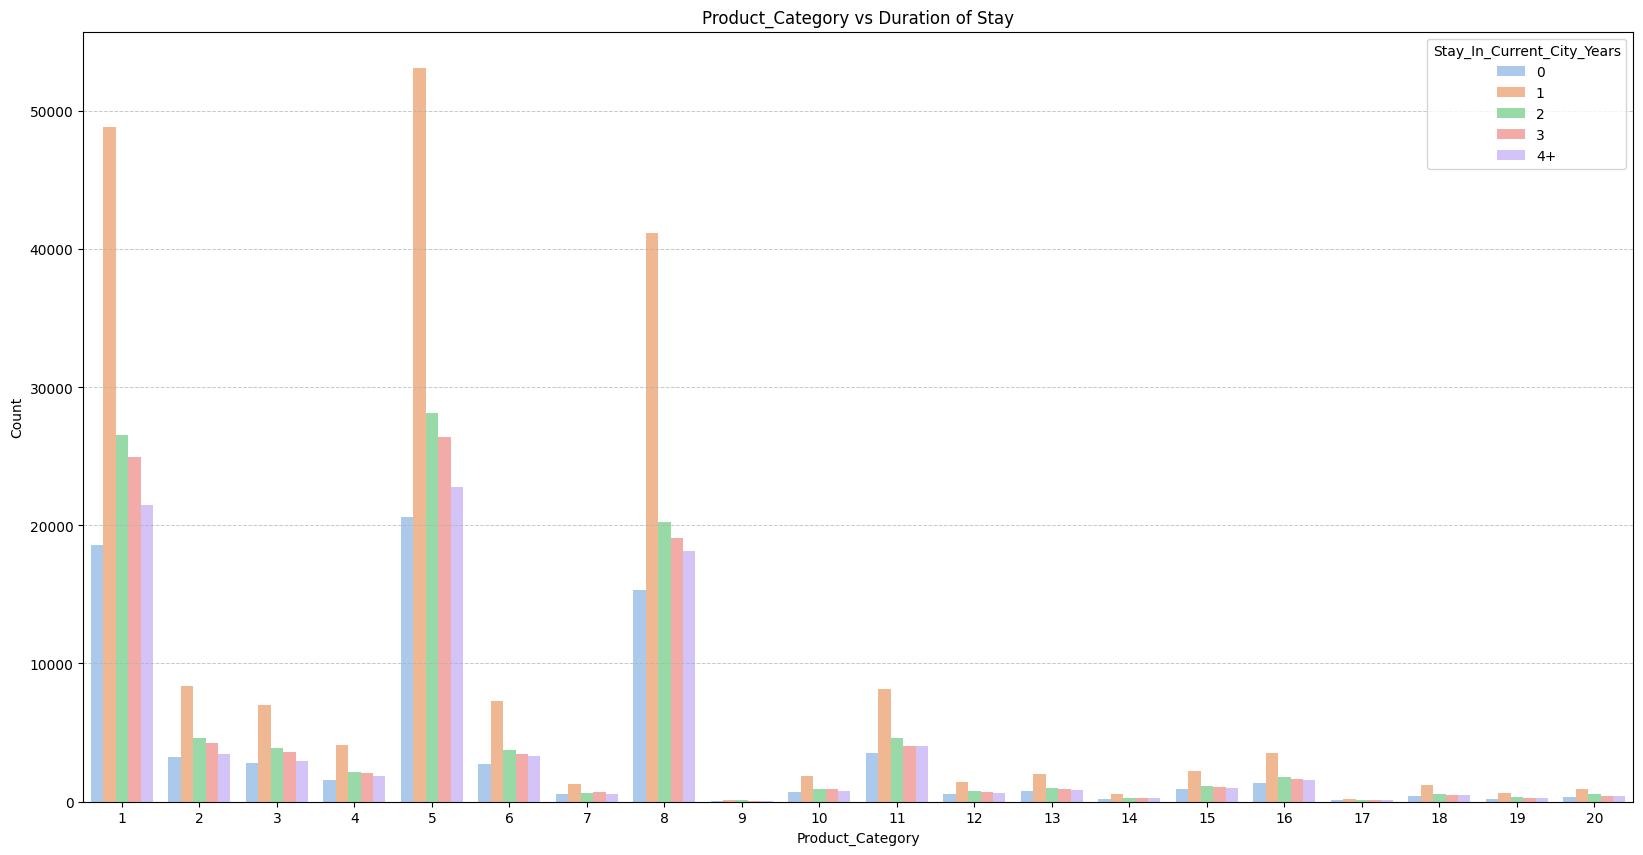

In [31]:
# Product Category v/s Age
plt.figure(figsize=(20,10))
sns.countplot(x='Product_Category', hue='Stay_In_Current_City_Years', data=dset, hue_order=['0', '1', '2', '3', '4+'], palette='pastel')
plt.title('Product_Category vs Duration of Stay')
plt.xlabel('Product_Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.show()

- Among all the product categories, people who stayed in their respective city for a year shops the most at Walmart. This possibly could be because once after a year of moving to the new city, they set up the house, buy new things to decorate, etc.
- We see the product category 5 is bought the most by the all different types of customers, followed by the category 1 and 8.

---

In [32]:
dset['Occupation'].astype(int).sort_values().unique().astype(str)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'], dtype='<U21')

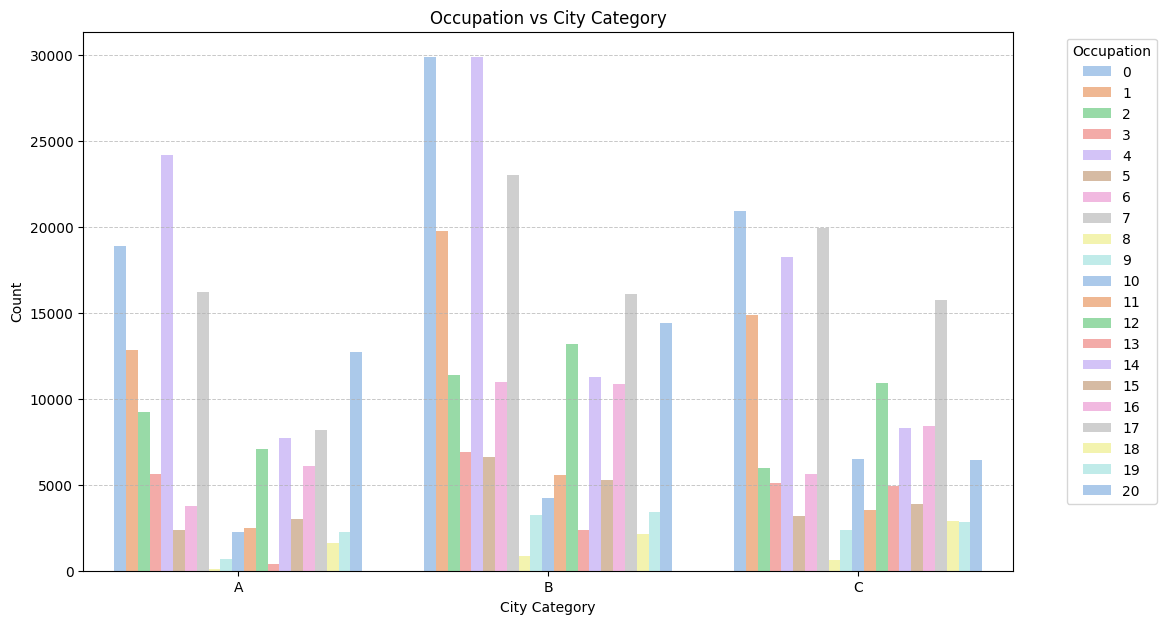

In [33]:
# Occupation v/s City Category

dset['Occupation'] = dset['Occupation'].astype(str)
plt.figure(figsize=(12,7))
sns.countplot(x='City_Category', hue='Occupation', data=dset, palette='pastel', hue_order=dset['Occupation'].astype(int).sort_values().unique().astype(str))
plt.title('Occupation vs City Category')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- Some occupations are more common in certain city categories, suggesting that these areas have a concentration of specific professional groups.
- City Category B has a wide variety of occupations, indicating that this category has a diverse professional landscape.

---

In [34]:
# Getting the top 5 most popular product categories for each age group
top_product_categories_per_age_group = {}

for age_group in dset['Age'].unique():
    top_categories = dset[dset['Age'] == age_group]['Product_Category'].value_counts().head(5)
    top_product_categories_per_age_group[age_group] = top_categories

top_product_categories_per_age_group

{'0-17': Product_Category
 5    4330
 1    3585
 8    2258
 3    1200
 2     805
 Name: count, dtype: int64,
 '55+': Product_Category
 8    6208
 5    5367
 1    4411
 2     905
 6     862
 Name: count, dtype: int64,
 '26-35': Product_Category
 5     61473
 1     58249
 8     44256
 11     9874
 2      8928
 Name: count, dtype: int64,
 '46-50': Product_Category
 5     11971
 8     10656
 1     10474
 2      2105
 11     2104
 Name: count, dtype: int64,
 '51-55': Product_Category
 5     9893
 8     9340
 1     9049
 2     1781
 11    1458
 Name: count, dtype: int64,
 '36-45': Product_Category
 5     29377
 1     27648
 8     23296
 11     4953
 2      4912
 Name: count, dtype: int64,
 '18-25': Product_Category
 5     28522
 1     26962
 8     17911
 3      4710
 11     4597
 Name: count, dtype: int64}

- Age Group 0-17:
    Product Category 5 ; Product Category 1; Product Category 8; Product Category 3; Product Category 2

- Age Group 55+:
    Product Category 8; Product Category 5; Product Category 1; Product Category 2; Product Category 6

- Age Group 26-35:
    Product Category 5; Product Category 1; Product Category 8; Product Category 11; Product Category 2

- Age Group 46-50:
    Product Category 5; Product Category 8; Product Category 1; Product Category 2; Product Category 11

- Age Group 51-55:
    Product Category 5; Product Category 8; Product Category 1; Product Category 2; Product Category 11

- Age Group 36-45:
    Product Category 5; Product Category 1; Product Category 8; Product Category 11; Product Category 2

- Age Group 18-25:
    Product Category 5; Product Category 1; Product Category 8; Product Category 3; Product Category 11

### Insights:
- Age groups 0-17 and 18-25 have a preference for product category 3, which does not appear in the top 5 for other age groups.
- Product categories 5, 1, and 8 are consistently popular across all age groups, appearing in the top 3 for every age group.
- Product category 3 might contain products that cater specifically to younger individuals.
- Product category 11 is favored by the middle age groups (26-35, 36-45, 46-50, and 51-55) but not by the youngest and oldest age groups.
- Marketing campaigns can target middle-aged groups with products from category 11, as it is popular in these age groups but not in others.

### Recommendations:
- Retailers should ensure a good stock of products from categories 5, 1, and 8 as they are popular across all age groups.
- Walmart should consider launching marketing campaigns to promote products from categories 3 and 11 to the respective age groups where these categories are popular.
- Retailers can explore cross-selling opportunities by bundling products from popular categories with those from less popular categories to boost sales.

### Confidence Intervals


We want to check whether there is a significant difference in the spending habits of male and female customers during Black Friday sales. For this, we will use CLT.
We'll take a small sample, say 1000 and increase it to get more accurate results.

In [35]:
# 95% confidence

# def gender_CI(sample_sizes, gender, conf_level, rand_state):
#   CI_dict = {}

#   for sample_size in sample_sizes:
#         CI_dict[sample_size] = {}
 
#   sample = df[df['Gender'] == gender]['Purchase'].sample(n=sample_sizes, random_state=rand_state)
#   sample_mean = sample.mean()
#   sample_std_dev = sample.std()
#   std_error = sample_std_dev/ np.sqrt(sample_sizes)
#   critical_z = norm.ppf((1 + conf_level)/2)
#   margin_of_error =  critical_z * std_error
#   conf_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
#   return sample_mean, sample_std_dev, std_error, conf_interval


def gender_CI(sample_sizes, conf_levels, gender, random_state):
  CI_dict = {}

  for sample_size in sample_sizes:
    CI_dict[sample_size] = {}
    sample = dset[dset['Gender'] == gender]['Purchase'].sample(n=sample_size, random_state=random_state)
    sample_mean = sample.mean()
    sample_std_dev = sample.std()
    std_error = sample_std_dev / np.sqrt(sample_size)
      
    for conf_level in conf_levels:      
      critical_z = norm.ppf((1 + conf_level) / 2)
      margin_of_error = critical_z * std_error
      conf_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
      
      CI_dict[sample_size][conf_level] = {'interval': conf_interval, 'sample_mean': sample_mean, 'sample_std_error': std_error, 'sample_std_dev': sample_std_dev }
          
  return CI_dict
  
conf_levels = [0.9, 0.95,.96,.97,.98, 0.99]
sample_sizes = [1000]
male_1000_CI = gender_CI(sample_sizes, conf_levels, 'M', 69)
female_1000_CI = gender_CI(sample_sizes, conf_levels, 'F', 69)

print("==> Males")
print("   Sample Mean: ",male_1000_CI[1000][.95]['sample_mean'])
print("   Sample Std Deviation: ", male_1000_CI[1000][.95]['sample_std_dev'])
print("   Sample Std Error: ", male_1000_CI[1000][.95]['sample_std_error'])
print("Purchase intervals of Males with sample size 1000 with 95% Confidence Interval - ", male_1000_CI[1000][.95]['interval'])
print("")

print("==> Females")
print("   Sample Mean: ", female_1000_CI[1000][.95]['sample_mean'])
print("   Sample Std Deviation: ", female_1000_CI[1000][.95]['sample_std_dev'])
print("   Sample Std Error: ", female_1000_CI[1000][.95]['sample_std_error'])
print("Purchase intervals of Females with sample size 1000 with 95% Confidence Interval - ", female_1000_CI[1000][.95]['interval'])


==> Males
   Sample Mean:  9480.694
   Sample Std Deviation:  5107.903821315727
   Sample Std Error:  161.52610144435423
Purchase intervals of Males with sample size 1000 with 95% Confidence Interval -  (9164.108658605903, 9797.279341394096)

==> Females
   Sample Mean:  8769.107
   Sample Std Deviation:  4810.508894428362
   Sample Std Error:  152.12164810892097
Purchase intervals of Females with sample size 1000 with 95% Confidence Interval -  (8470.95404843764, 9067.25995156236)


- The confidence interval for male customers is higher, indicating a higher average purchase amount compared to female customers.
- The intervals do not overlap, suggesting a statistically significant difference in the average purchase amounts between the two groups.

In [36]:
# 99 % Confidence

print("==> Males")
print("Purchase intervals of Males with sample size 1000 with 99% Confidence Interval - ", male_1000_CI[1000][.99]['interval'])
print("==> Females")
print("Purchase intervals of Females with sample size 1000 with 99% Confidence Interval -  ",female_1000_CI[1000][.99]['interval'])

print("")
print("==> Males")
print("Purchase intervals of Males with sample size 1000 with 98% Confidence Interval - ", male_1000_CI[1000][.98]['interval'])
print("==> Females")
print("Purchase intervals of Females with sample size 1000 with 98% Confidence Interval -  ",female_1000_CI[1000][.98]['interval'])

print("")
print("==> Males")
print("Purchase intervals of Males with sample size 1000 with 97% Confidence Interval - ", male_1000_CI[1000][.97]['interval'])
print("==> Females")
print("Purchase intervals of Females with sample size 1000 with 97% Confidence Interval -  ",female_1000_CI[1000][.97]['interval'])


==> Males
Purchase intervals of Males with sample size 1000 with 99% Confidence Interval -  (9064.63033461162, 9896.757665388379)
==> Females
Purchase intervals of Females with sample size 1000 with 99% Confidence Interval -   (8377.267601096888, 9160.946398903112)

==> Males
Purchase intervals of Males with sample size 1000 with 98% Confidence Interval -  (9104.928097302822, 9856.459902697177)
==> Females
Purchase intervals of Females with sample size 1000 with 98% Confidence Interval -   (8415.219127326223, 9122.994872673777)

==> Males
Purchase intervals of Males with sample size 1000 with 97% Confidence Interval -  (9130.167761526858, 9831.22023847314)
==> Females
Purchase intervals of Females with sample size 1000 with 97% Confidence Interval -   (8438.989275216527, 9099.224724783473)


So, we see with 1000 samples that we have taken, at 98% confidence level, it starts to overlap. So we can say that at 97% CI, males spend more than females, on an average.


Let's try the same with different sample size ( max upto 10% of the population) and different confidence levels.

In [37]:
males_size = dset[dset['Gender'] == 'M'].shape[0]
females_size = dset[dset['Gender'] == 'F'].shape[0]
unmarried_size = dset[dset['Marital_Status'] == '0'].shape[0]
married_size = dset[dset['Marital_Status'] == '1'].shape[0]
cityA_size=dset[dset['City_Category'] == 'A'].shape[0]
cityB_size=dset[dset['City_Category'] == 'B'].shape[0]
cityC_size=dset[dset['City_Category'] == 'C'].shape[0]
cityA_males_size=dset[(dset['City_Category'] == 'A') & (dset['Gender'] == 'M')].shape[0]
cityB_males_size=dset[(dset['City_Category'] == 'B') & (dset['Gender'] == 'M')].shape[0]
cityC_males_size=dset[(dset['City_Category'] == 'C') & (dset['Gender'] == 'M')].shape[0]
cityA_females_size=dset[(dset['City_Category'] == 'A') & (dset['Gender'] == 'F')].shape[0]
cityB_females_size=dset[(dset['City_Category'] == 'B') & (dset['Gender'] == 'F') ].shape[0]
cityC_females_size=dset[(dset['City_Category'] == 'C') & (dset['Gender'] == 'F')].shape[0]

print("Male size = ",males_size)
print("Female size = ",females_size)
print("Unmarried size = ",unmarried_size)
print("Married size = ",married_size)
print("City A size = ",cityA_size)
print("City B size = ",cityB_size)
print("City C size = ",cityC_size)
print("City A males size = ",cityA_males_size)
print("City B males size = ",cityB_males_size)
print("City C males size = ",cityC_males_size)
print("City A females size = ",cityA_females_size)
print("City B females size = ",cityB_females_size)
print("City C females size = ",cityC_females_size)

Male size =  414259
Female size =  135809
Unmarried size =  324731
Married size =  225337
City A size =  147720
City B size =  231173
City C size =  171175
City A males size =  112016
City B males size =  173377
City C males size =  128866
City A females size =  35704
City B females size =  57796
City C females size =  42309


In [38]:
males_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 41425, 50000]
females_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 13580, 50000 ]
unmarried_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 32473, 50000 ]
married_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 22533, 50000 ]
cityA_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 14772, 50000 ]
cityB_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 23117, 50000 ]
cityC_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 17117, 50000 ]
cityA_males_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 11201, 50000 ]
cityB_males_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 17337, 50000 ]
cityC_males_samp_sizes = [ 1000, 2000, 3000, 5000, 10000, 12886, 50000 ]

# all population considered here.
cityA_females_samp_sizes = [ 500, 1000, 2000, 3000, 5000, 10000, 35704 ]
cityB_females_samp_sizes = [ 500, 1000, 2000, 3000, 5000, 10000, 57796 ]
cityC_females_samp_sizes = [ 500, 1000, 2000, 3000, 5000, 10000, 42309 ]

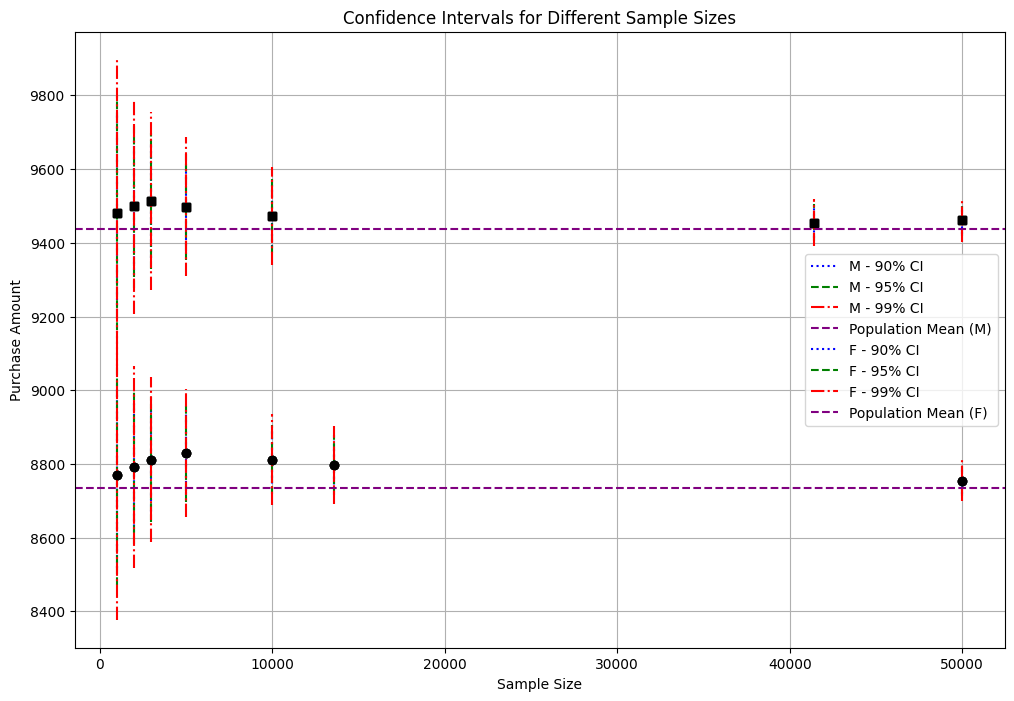

In [39]:
plt.style.use('default')

def plot_CIs(CI_dict_male, CI_dict_female, population_mean_male, population_mean_female):
  fig, ax = plt.subplots(figsize=(12,8))
  
  conf_level_colors = {0.9: 'blue', 0.95: 'green', 0.99: 'red'}
  linestyle = {0.9: 'dotted', 0.95: 'dashed', 0.99: 'dashdot'}
  markers = {'M' : 's', 'F': 'o'}

  data=[]
  
  for gender, CI_dict, pop_mean in zip(['M', 'F'], [CI_dict_male, CI_dict_female], [population_mean_male, population_mean_female]):
    # print("==> Gender : ", gender)
    for sample_size in CI_dict.keys():
      # print("  Sample Size : ", sample_size)
      for conf_level in CI_dict[sample_size].keys():
        if conf_level in [0.9, 0.95, 0.99]:
          # print("     Confidence Level: ", conf_level)
          conf_interval = CI_dict[sample_size][conf_level]['interval']
          sample_mean = CI_dict[sample_size][conf_level]['sample_mean']
          lower_bound, upper_bound = conf_interval
          data.append([gender, sample_size,conf_level,lower_bound,upper_bound])
          # print("     Lower bound: ", lower_bound, end="")
          # print("     Upper bound: ", upper_bound)
          # print("")

          ax.plot( (sample_size, sample_size), (lower_bound, upper_bound), label=f'{gender} - {int(conf_level * 100)}% CI', color=conf_level_colors[conf_level], linestyle=linestyle[conf_level])
          ax.plot(sample_size, sample_mean,marker=markers[gender], color='black')

    ax.axhline(y=pop_mean, color='purple', linestyle='--', label=f'Population Mean ({gender})')
    
  ax.set_ylabel('Purchase Amount')
  ax.set_xlabel('Sample Size')
  ax.set_title('Confidence Intervals for Different Sample Sizes')
  ax.grid(True)

  gender_ci_table = pd.DataFrame(data, columns=['Gender', 'Sample Size', 'Confidence Level', 'Lower Bound', 'Upper Bound'])
  # Adding legend to differentiate between male and female CIs
  handles, labels = ax.get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  ax.legend(by_label.values(), by_label.keys())
  
  plt.show()
  return gender_ci_table

# Example usage:
population_mean_male = df[df['Gender'] == 'M']['Purchase'].mean()
population_mean_female = df[df['Gender'] == 'F']['Purchase'].mean()

CI_dict_male = gender_CI(males_samp_sizes, conf_levels, 'M', 69)
CI_dict_female = gender_CI(females_samp_sizes, conf_levels, 'F', 69)

gender_ci_table=plot_CIs(CI_dict_male, CI_dict_female, population_mean_male, population_mean_female)


In [40]:
gender_ci_table

,Gender,Sample Size,Confidence Level,Lower Bound,Upper Bound
0,M,1000,0.90,9215.007206,9746.380794
1,M,1000,0.95,9164.108659,9797.279341
2,M,1000,0.99,9064.630335,9896.757665
3,M,2000,0.90,9313.413178,9685.877822
4,M,2000,0.95,9277.736001,9721.554999
5,M,2000,0.99,9208.006983,9791.284017
6,M,3000,0.90,9359.345442,9667.601225
7,M,3000,0.95,9329.818623,9697.128044
8,M,3000,0.99,9272.110130,9754.836537
9,M,5000,0.90,9376.788482,9617.799918


- We see that sample mean and population mean of the respective genders are close which indicates that samples are well representative of the population.
- As we increased the confidence level, confidence intervals also increased as expected as higher confidence level requires a wider interval to capture the population parameter.
- We see that as we increased the sample size, the confidence intervals become narrower, precision of the estimates increases as well.
- Although the confidence intervals for males and females overlapped at smaller sample sizes and confidence levels, as we increased the sample sizes, there is no overlap which indicates that there is a significant difference in the purchase amounts between the two groups.
- With 50K samples, 99% confidence level, we can say that Range of males purchase amount would be within 9403.15 and 9520.86 in USD
- With 50K samples, 99% confidence level, we can say that Range of females purchase amount would be within 8699.44 and 8809.60 in USD
### Recommendations:
- Walmart should develop gender-specific marketing strategies to better target the distinct customer groups.
- Understanding the spending patterns of different genders can help in inventory management, sales forecasting, and personalized offers to enhance customer satisfaction and business profitability.

In [41]:
## Trying with a general function

def category_CI(df, sample_sizes, conf_levels, category, category_value, random_state):
  CI_dict = {}

  for sample_size in sample_sizes:
    CI_dict[sample_size] = {}
    sample = df[df[category] == category_value]['Purchase'].sample(n=sample_size, random_state=random_state)
    sample_mean = sample.mean()
    sample_std_dev = sample.std()
    std_error = sample_std_dev / np.sqrt(sample_size)
      
    for conf_level in conf_levels:      
      critical_z = norm.ppf((1 + conf_level) / 2)
      margin_of_error = critical_z * std_error
      conf_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
      
      CI_dict[sample_size][conf_level] = {'interval': conf_interval, 'sample_mean': sample_mean, 'sample_std_error': std_error, 'sample_std_dev': sample_std_dev }
          
  return CI_dict

def plot_category_CIs(CI_dicts, category_labels, population_means, conf_level_colors, linestyle ):
  fig, ax = plt.subplots(figsize=(12,8))
  
  # conf_level_colors = {0.9: 'blue', 0.95: 'green', 0.99: 'red'}
  # linestyle = {0.9: 'dotted', 0.95: 'dashed', 0.99: 'dashdot'}
  # markers = {'M' : 's', 'F': 'o'}

  data=[]
  
  for CI_dict, category_label, pop_mean in zip(CI_dicts, category_labels, population_means):
    for sample_size in CI_dict.keys():
      for conf_level in CI_dict[sample_size].keys():
        conf_interval = CI_dict[sample_size][conf_level]['interval']
        sample_mean = CI_dict[sample_size][conf_level]['sample_mean']
        lower_bound, upper_bound = conf_interval
        data.append([category_label, sample_size, conf_level, lower_bound, upper_bound,CI_dict[sample_size][conf_level]['sample_std_dev'],CI_dict[sample_size][conf_level]['sample_std_error']])

        ax.plot( (sample_size, sample_size), (lower_bound, upper_bound), label=f'{category_label} - {int(conf_level * 100)}% CI', c=conf_level_colors[conf_level], ls=linestyle[conf_level])
        ax.plot(sample_size, sample_mean, marker='o', color='black')

    ax.axhline(y=pop_mean, color='purple', linestyle='--', label=f'Population Mean ({category_label})')
    
  ax.set_ylabel('Purchase Amount')
  ax.set_xlabel('Sample Size')
  ax.set_title('Confidence Intervals for Different Sample Sizes')
  ax.grid(True)

  category_ci_table = pd.DataFrame(data, columns=['Category', 'Sample Size', 'Confidence Level', 'Lower Bound', 'Upper Bound','Std. Deviation','Std. Error'])
  
  # Adding legend
  handles, labels = ax.get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1,1))
  
  plt.show()
  return category_ci_table


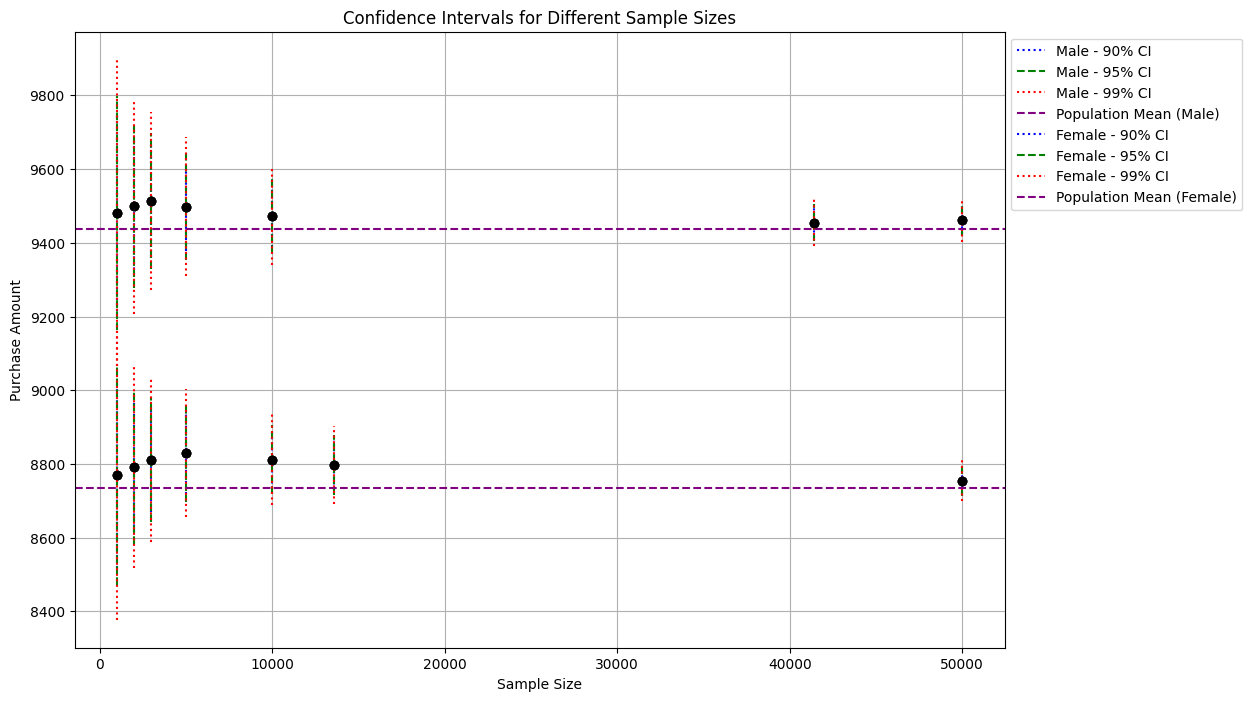

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,Male,1000,0.90,9215.007206,9746.380794,5107.903821,161.526101
1,Male,1000,0.95,9164.108659,9797.279341,5107.903821,161.526101
2,Male,1000,0.99,9064.630335,9896.757665,5107.903821,161.526101
3,Male,2000,0.90,9313.413178,9685.877822,5063.406562,113.221213
4,Male,2000,0.95,9277.736001,9721.554999,5063.406562,113.221213
5,Male,2000,0.99,9208.006983,9791.284017,5063.406562,113.221213
6,Male,3000,0.90,9359.345442,9667.601225,5132.330421,93.703105
7,Male,3000,0.95,9329.818623,9697.128044,5132.330421,93.703105
8,Male,3000,0.99,9272.110130,9754.836537,5132.330421,93.703105
9,Male,5000,0.90,9376.788482,9617.799918,5180.425092,73.262274


In [42]:
conf_levels = [0.9, 0.95, 0.99]
conf_level_colors = {0.9: 'blue', 0.95: 'green', 0.99: 'red'}
population_mean_male = dset[dset['Gender'] == 'M']['Purchase'].mean()
population_mean_female = dset[dset['Gender'] == 'F']['Purchase'].mean()

CI_dict_male = category_CI(dset, males_samp_sizes, conf_levels, 'Gender', 'M', 69)
CI_dict_female = category_CI(dset, females_samp_sizes, conf_levels, 'Gender', 'F', 69)

linestyle = {0.9: 'dotted', 0.95: 'dashed', 0.99: ':'}
plot_category_CIs([CI_dict_male, CI_dict_female], ['Male', 'Female'], [population_mean_male, population_mean_female], conf_level_colors, linestyle)

# Same output as above. Will try with other categories

Unmarried pop mean -  9265.907618921507
Married pop mean  9261.174574082374


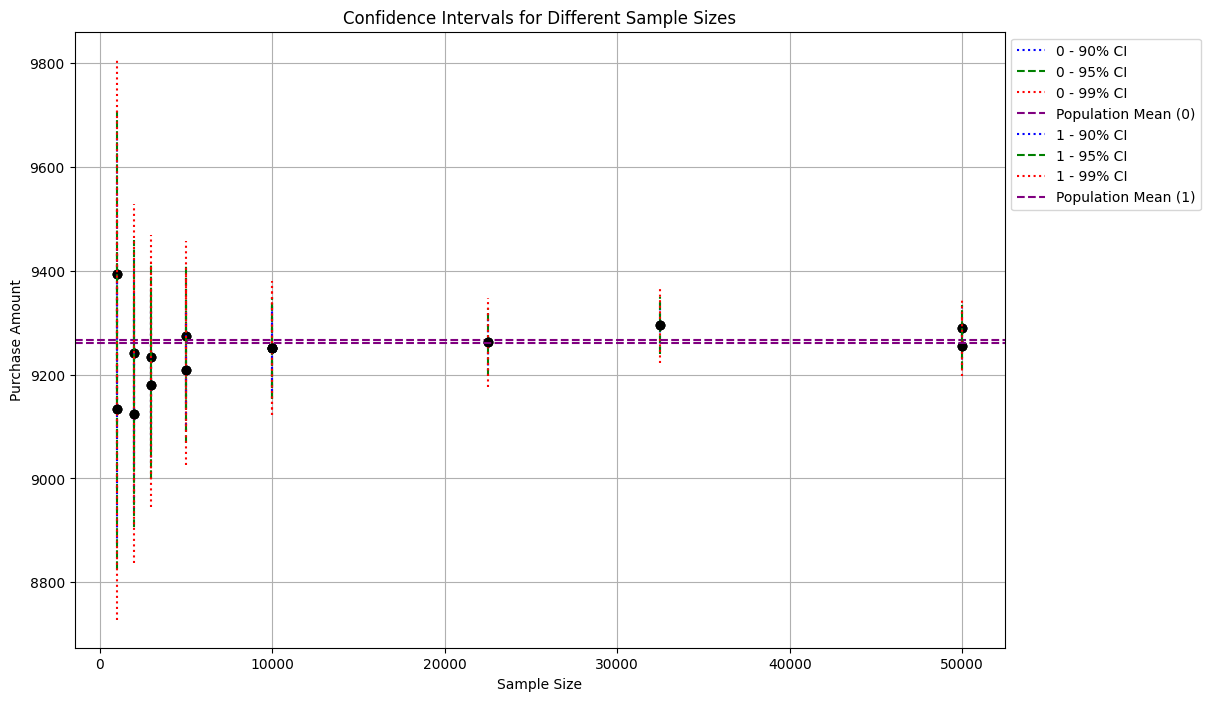

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,0,1000,0.90,9130.772411,9657.265589,5060.990195,160.042562
1,0,1000,0.95,9080.341342,9707.696658,5060.990195,160.042562
2,0,1000,0.99,8981.776678,9806.261322,5060.990195,160.042562
3,0,2000,0.90,9057.552833,9424.718167,4991.365994,111.610337
4,0,2000,0.95,9022.383260,9459.887740,4991.365994,111.610337
5,0,2000,0.99,8953.646324,9528.624676,4991.365994,111.610337
6,0,3000,0.90,9083.835172,9383.904828,4996.034820,91.214699
7,0,3000,0.95,9055.092475,9412.647525,4996.034820,91.214699
8,0,3000,0.99,8998.916506,9468.823494,4996.034820,91.214699
9,0,5000,0.90,9159.011527,9391.431673,4995.759447,70.650708


In [43]:
# Marital Status CI
# Blue for unmarried  and Red for Married

conf_levels = [0.9, 0.95, 0.99]
conf_level_colors = {0.9: 'blue', 0.95: 'green', 0.99: 'red'}

population_mean_unmarried = dset[dset['Marital_Status'] == '0']['Purchase'].mean()
population_mean_married = dset[dset['Marital_Status'] == '1']['Purchase'].mean()
print("Unmarried pop mean - ", population_mean_unmarried)
print("Married pop mean ", population_mean_married)

CI_dict_unmarried = category_CI(dset, unmarried_samp_sizes, conf_levels, 'Marital_Status', '0', 69)
CI_dict_married = category_CI(dset, married_samp_sizes, conf_levels, 'Marital_Status', '1', 69)

plot_category_CIs([CI_dict_unmarried, CI_dict_married], [0, 1], [population_mean_unmarried, population_mean_married], conf_level_colors, linestyle)


- Between married and unmarried categories, as we see from the chart and the table, there are lot of overlaps  beween various sample sizes and confidence levels. So even with 90% confidence level, there is an overlap, so to overcome this, we will reduce the confidence level and see what it displays.
- The population mean of the married and unmarried customers is very close.
- We see that the sample mean gets close to the population mean only after 5000 samples.

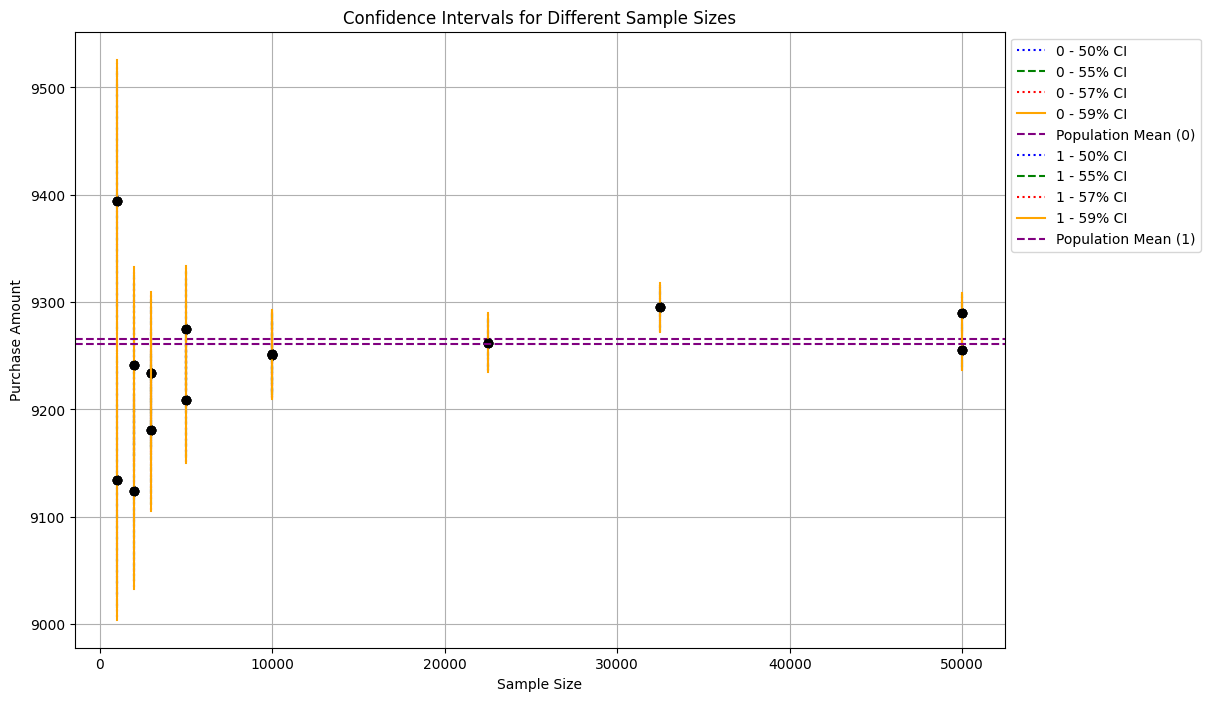

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,0,1000,0.50,9286.071932,9501.966068,5060.990195,160.042562
1,0,1000,0.55,9273.120444,9514.917556,5060.990195,160.042562
2,0,1000,0.58,9264.957277,9523.080723,5060.990195,160.042562
3,0,1000,0.59,9262.160952,9525.877048,5060.990195,160.042562
4,0,2000,0.50,9165.855472,9316.415528,4991.365994,111.610337
5,0,2000,0.55,9156.823375,9325.447625,4991.365994,111.610337
6,0,2000,0.58,9151.130553,9331.140447,4991.365994,111.610337
7,0,2000,0.59,9149.180455,9333.090545,4991.365994,111.610337
8,0,3000,0.50,9172.346620,9295.393380,4996.034820,91.214699
9,0,3000,0.55,9164.965046,9302.774954,4996.034820,91.214699


In [44]:
conf_levels=[ 0.5, 0.55, 0.58, 0.59]
conf_level_colors = {0.5: 'blue', 0.55: 'green', 0.58: 'red', 0.59: 'orange'}
linestyle = {0.5: 'dotted', 0.55: 'dashed', 0.58: ':', 0.59: 'solid' }
CI_dict_unmarried = category_CI(df, unmarried_samp_sizes, conf_levels, 'Marital_Status', 0, 69)
CI_dict_married = category_CI(df, married_samp_sizes, conf_levels, 'Marital_Status', 1, 69)

plot_category_CIs([CI_dict_unmarried, CI_dict_married], [0, 1], [population_mean_unmarried, population_mean_married], conf_level_colors, linestyle)

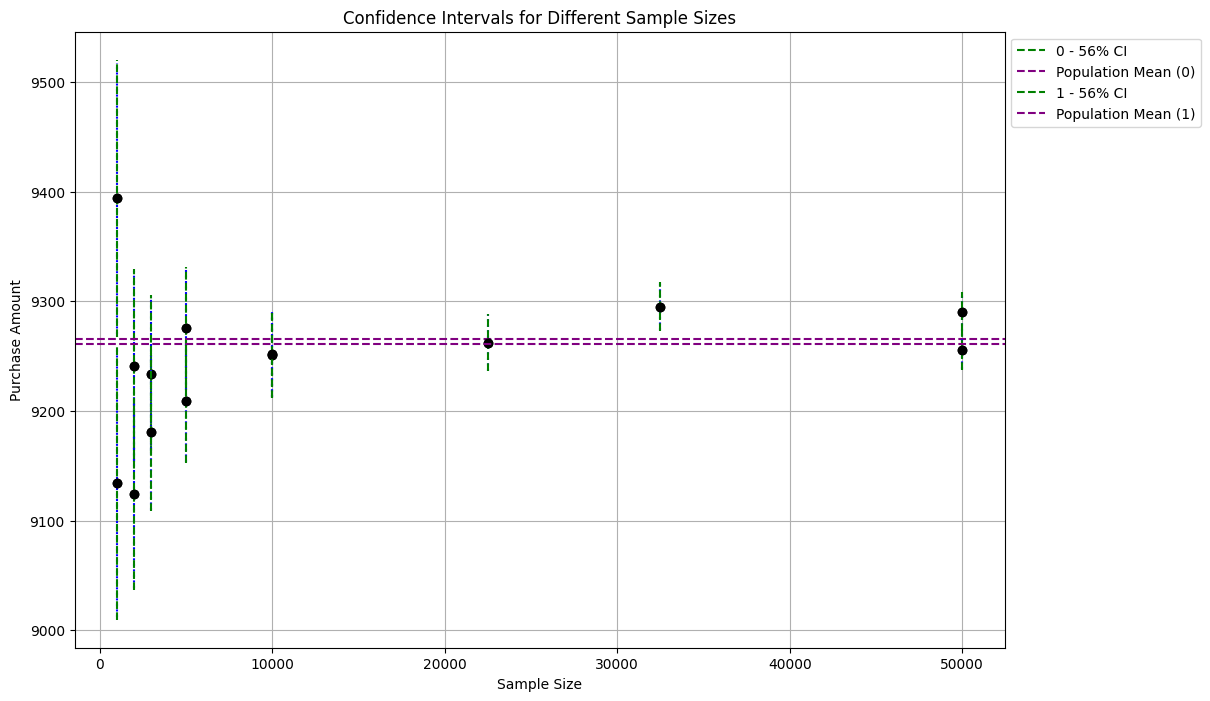

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,0,1000,0.56,9270.435219,9517.602781,5060.990195,160.042562
1,0,1000,0.57,9267.714746,9520.323254,5060.990195,160.042562
2,0,2000,0.56,9154.950755,9327.320245,4991.365994,111.610337
3,0,2000,0.57,9153.053554,9329.217446,4991.365994,111.610337
4,0,3000,0.56,9163.434628,9304.305372,4996.034820,91.214699
5,0,3000,0.57,9161.884121,9305.855879,4996.034820,91.214699
6,0,5000,0.56,9220.665603,9329.777597,4995.759447,70.650708
7,0,5000,0.57,9219.464651,9330.978549,4995.759447,70.650708
8,0,10000,0.56,9212.261452,9289.055348,4972.453421,49.724534
9,0,10000,0.57,9211.416213,9289.900587,4972.453421,49.724534


In [45]:
conf_levels=[.56, .57]
CI_dict_unmarried = category_CI(dset, unmarried_samp_sizes, conf_levels, 'Marital_Status', '0', 69)
CI_dict_married = category_CI(dset, married_samp_sizes, conf_levels, 'Marital_Status', '1', 69)

conf_level_colors = {0.56: 'blue', 0.57: 'green'}
linestyle = {0.56: 'dotted', 0.57: 'dashed'}

plot_category_CIs([CI_dict_unmarried, CI_dict_married], ['0', '1'], [population_mean_unmarried, population_mean_married], conf_level_colors, linestyle)

From the table and chart, we notice that at 56% confidence level, intervals do not overlap.
 - Unmarried customers have an interval of (9272.88, 9307.72) in USD
 - Married customers have an purchase amount interval of (9237.78, 9272.40) in USD

Since it overlaps at higher confidence levels, we can conclude that statistically there is not a significant difference in the average purchase amounts between unmarried and married groups and possible quite similar.

In [46]:
# City Category CIs

cityA_pop_mean = dset[dset['City_Category'] == 'A']['Purchase'].mean()
cityB_pop_mean = dset[dset['City_Category'] == 'B']['Purchase'].mean()
cityC_pop_mean = dset[dset['City_Category'] == 'C']['Purchase'].mean()
print("Population mean of the purchase amount of the customers from City A : ", cityA_pop_mean)
print("Population mean of the purchase amount of the customers from City B : ", cityB_pop_mean)
print("Population mean of the purchase amount of the customers from City C : ", cityC_pop_mean)

Population mean of the purchase amount of the customers from City A :  8911.939216084484
Population mean of the purchase amount of the customers from City B :  9151.300562781986
Population mean of the purchase amount of the customers from City C :  9719.92099313568


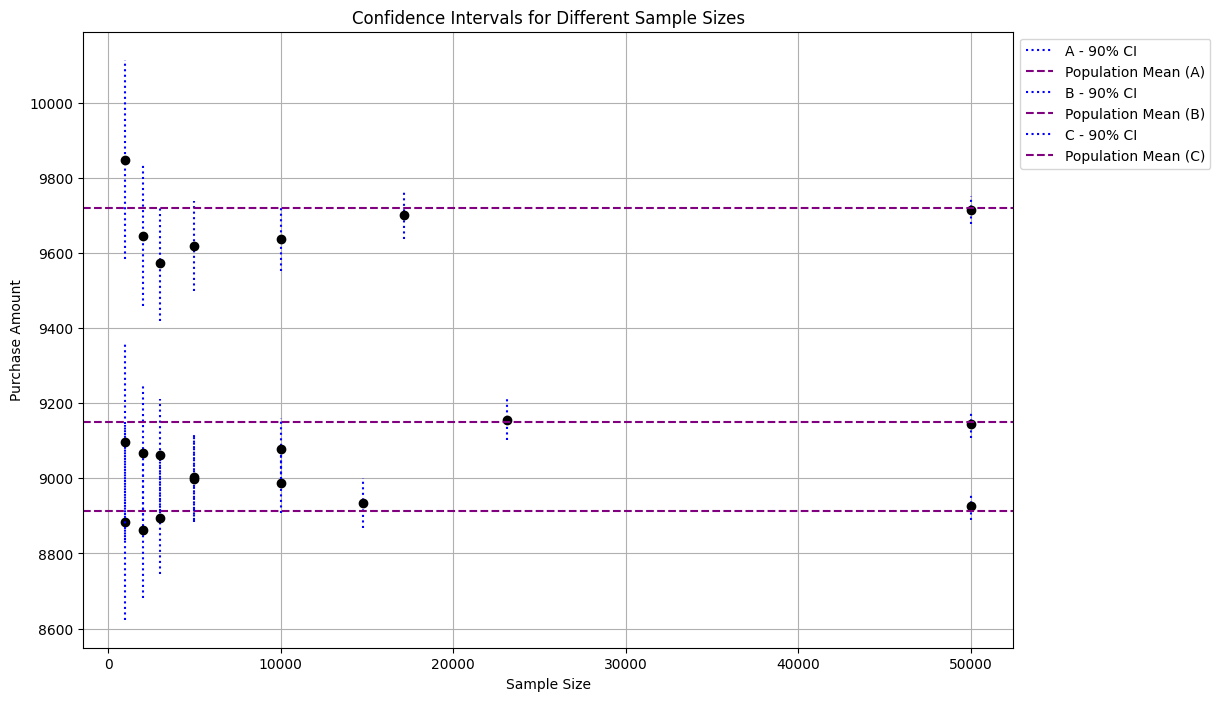

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,A,1000,0.9,8623.620248,9142.511752,4987.918026,157.731817
1,A,2000,0.9,8681.838380,9042.976620,4909.431710,109.778230
2,A,3000,0.9,8745.680145,9042.457189,4941.214193,90.213816
3,A,5000,0.9,8889.725464,9119.974936,4949.101852,69.990870
4,A,10000,0.9,8906.673730,9068.297670,4913.018910,49.130189
5,A,14772,0.9,8868.920195,9001.973523,4915.731319,40.445340
6,A,50000,0.9,8889.265564,8961.569076,4914.588327,21.978707
7,B,1000,0.9,8834.830659,9357.975341,5028.802310,159.024692
8,B,2000,0.9,8885.425511,9250.617489,4964.539535,111.010479
9,B,3000,0.9,8912.685407,9210.027259,4950.618007,90.385505


In [47]:
# conf_level_colors = {0.9: 'blue', 0.95: 'green', 0.99: 'red'}
conf_level_colors = {0.9: 'blue', 0.95: 'green', 0.99: 'red'}
linestyle = {0.9: 'dotted', 0.95: 'dashed', 0.99: ':'}
conf_levels=[0.9]
CI_dict_cityA = category_CI(dset, cityA_samp_sizes, conf_levels, 'City_Category', 'A', 69)
CI_dict_cityB = category_CI(dset, cityB_samp_sizes, conf_levels, 'City_Category', 'B', 69)
CI_dict_cityC = category_CI(dset, cityC_samp_sizes, conf_levels, 'City_Category', 'C', 69)
plot_category_CIs([CI_dict_cityA, CI_dict_cityB, CI_dict_cityC], ['A','B','C'], [cityA_pop_mean, cityB_pop_mean,cityC_pop_mean], conf_level_colors, linestyle)

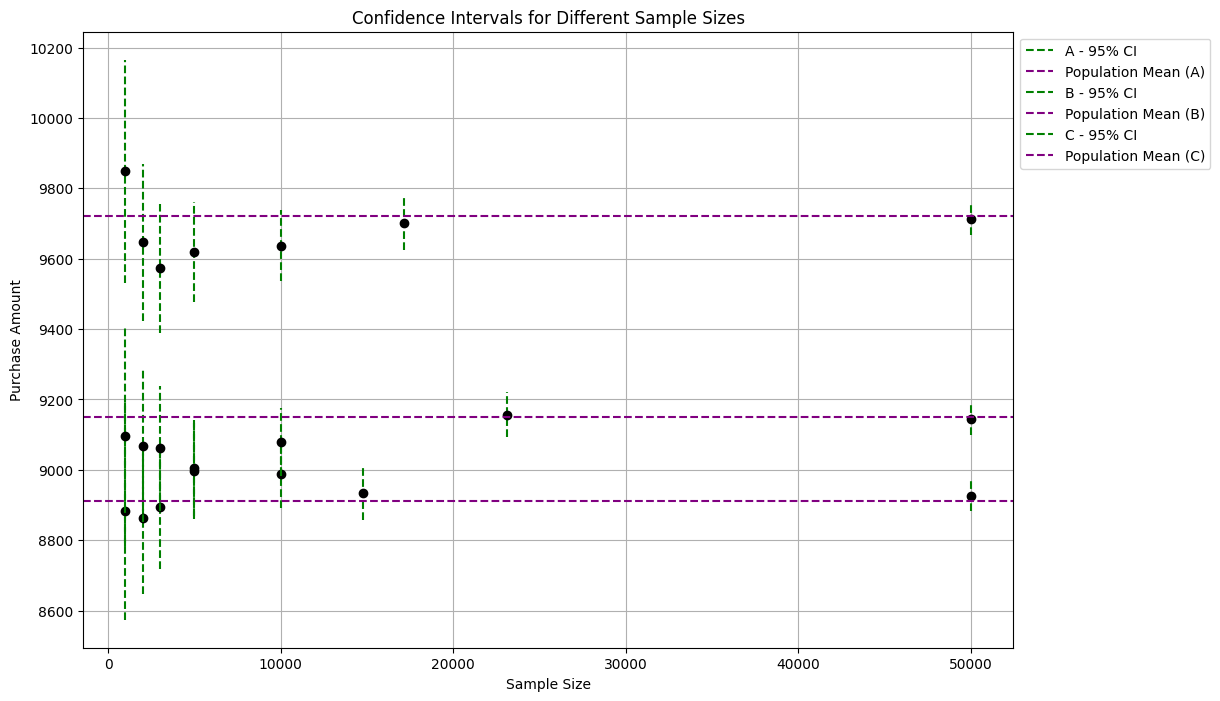

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,A,1000,0.95,8573.917319,9192.214681,4987.918026,157.731817
1,A,2000,0.95,8647.246122,9077.568878,4909.431710,109.778230
2,A,3000,0.95,8717.252837,9070.884497,4941.214193,90.213816
3,A,5000,0.95,8867.670616,9142.029784,4949.101852,69.990870
4,A,10000,0.95,8891.192299,9083.779101,4913.018910,49.130189
5,A,14772,0.95,8856.175450,9014.718268,4915.731319,40.445340
6,A,50000,0.95,8882.339846,8968.494794,4914.588327,21.978707
7,B,1000,0.95,8784.720331,9408.085669,5028.802310,159.024692
8,B,2000,0.95,8850.444960,9285.598040,4964.539535,111.010479
9,B,3000,0.95,8884.203998,9238.508668,4950.618007,90.385505


In [48]:
conf_levels=[0.95]
CI_dict_cityA = category_CI(dset, cityA_samp_sizes, conf_levels, 'City_Category', 'A', 69)
CI_dict_cityB = category_CI(dset, cityB_samp_sizes, conf_levels, 'City_Category', 'B', 69)
CI_dict_cityC = category_CI(dset, cityC_samp_sizes, conf_levels, 'City_Category', 'C', 69)
plot_category_CIs([CI_dict_cityA, CI_dict_cityB, CI_dict_cityC], ['A','B','C'], [cityA_pop_mean, cityB_pop_mean,cityC_pop_mean], conf_level_colors, linestyle)

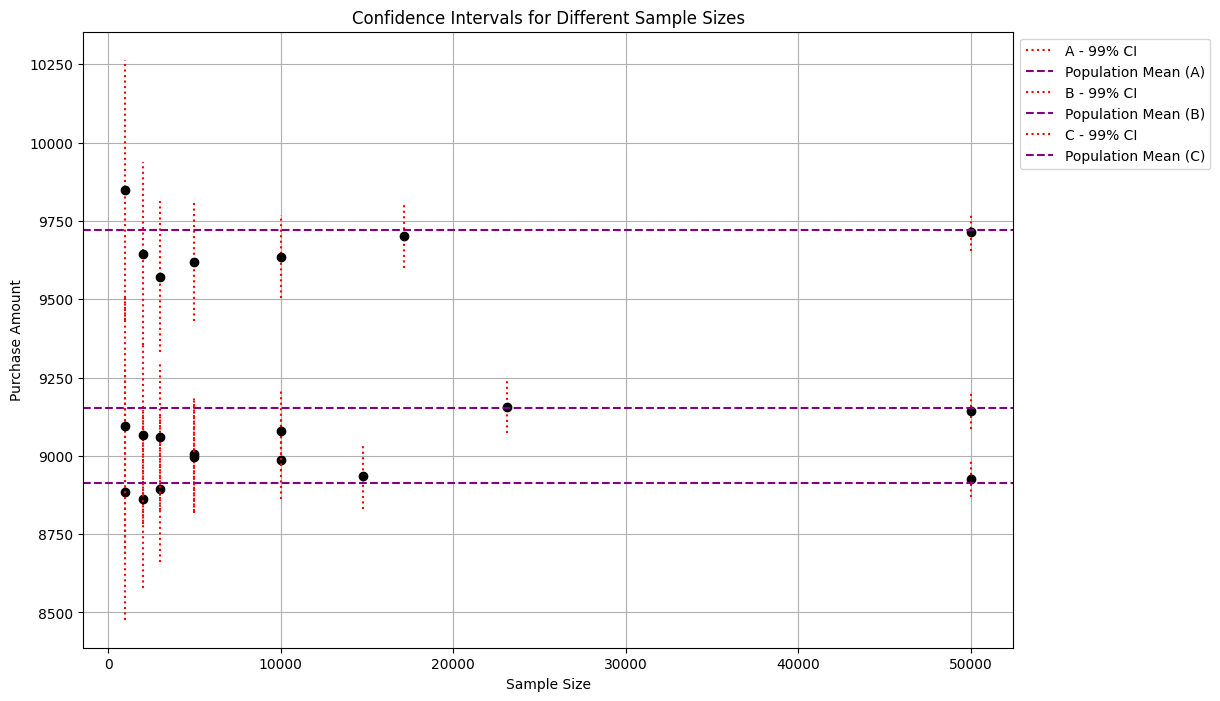

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,A,1000,0.99,8476.775763,9289.356237,4987.918026,157.731817
1,A,2000,0.99,8579.637517,9145.177483,4909.431710,109.778230
2,A,3000,0.99,8661.693276,9126.444057,4941.214193,90.213816
3,A,5000,0.99,8824.565667,9185.134733,4949.101852,69.990870
4,A,10000,0.99,8860.934719,9114.036681,4913.018910,49.130189
5,A,14772,0.99,8831.266568,9039.627150,4915.731319,40.445340
6,A,50000,0.99,8868.803922,8982.030718,4914.588327,21.978707
7,B,1000,0.99,8686.782538,9506.023462,5028.802310,159.024692
8,B,2000,0.99,8782.077456,9353.965544,4964.539535,111.010479
9,B,3000,0.99,8828.538700,9294.173966,4950.618007,90.385505


In [49]:
conf_levels=[0.99]
CI_dict_cityA = category_CI(dset, cityA_samp_sizes, conf_levels, 'City_Category', 'A', 69)
CI_dict_cityB = category_CI(dset, cityB_samp_sizes, conf_levels, 'City_Category', 'B', 69)
CI_dict_cityC = category_CI(dset, cityC_samp_sizes, conf_levels, 'City_Category', 'C', 69)
plot_category_CIs([CI_dict_cityA, CI_dict_cityB, CI_dict_cityC], ['A','B','C'], [cityA_pop_mean, cityB_pop_mean,cityC_pop_mean], conf_level_colors, linestyle)

- From the above charts and tables, we can say with 99% confidence, that customers from City C spends more than City B who inturn spends more than City A.
- The range of avg purchase amount would lie between for ( in USD)
  -  City A : 8868.80 - 8982.03
  -  City B : 9086.54 -	9200.82
  -  City C : 9654.21 -	9773.70

In [50]:
age17_size = dset[dset['Age'] == '0-17'].shape[0]
age25_size = dset[dset['Age'] == '18-25'].shape[0]
age35_size = dset[dset['Age'] == '26-35'].shape[0]
age45_size = dset[dset['Age'] == '36-45'].shape[0]
age50_size = dset[dset['Age'] == '46-50'].shape[0]
age55_size = dset[dset['Age'] == '51-55'].shape[0]
age90_size = dset[dset['Age'] == '55+'].shape[0]

print("Age 0-17 size: ",age17_size)
print("Age 18-25 size: ",age25_size)
print("Age 26-35 size: ",age35_size)
print("Age 36-45 size: ",age45_size)
print("Age 46-50 size: ",age50_size)
print("Age 51-55 size: ",age55_size)
print("Age 55+ size: ",age90_size)

Age 0-17 size:  15102
Age 18-25 size:  99660
Age 26-35 size:  219587
Age 36-45 size:  110013
Age 46-50 size:  45701
Age 51-55 size:  38501
Age 55+ size:  21504


Age 0-17 pop mean of Purchase amount -  8933.464640444974
Age 18-25 pop mean of Purchase amount -  9169.663606261289
Age 26-35 pop mean of Purchase amount -  9252.690632869888
Age 36-45 pop mean of Purchase amount -  9331.350694917874
Age 46-50 pop mean of Purchase amount -  9208.625697468327
Age 50-55 pop mean of Purchase amount -  9534.808030960236
Age 55+ pop mean of Purchase amount -  9336.280459449405


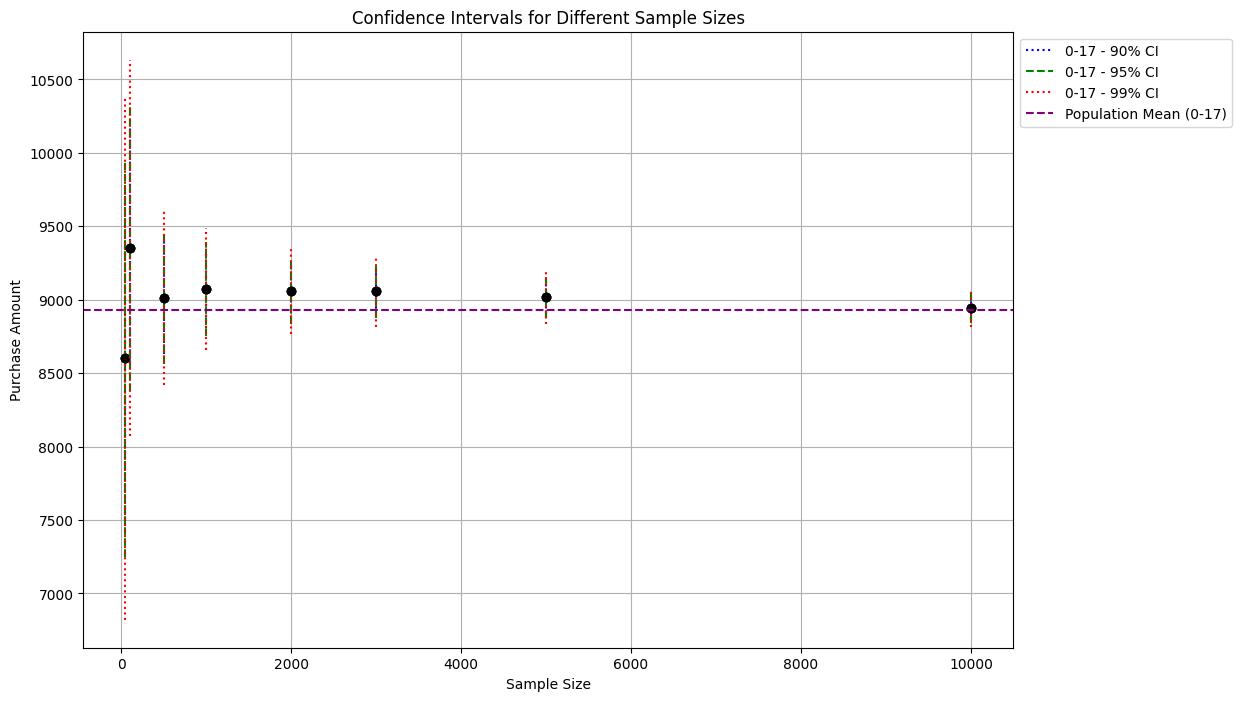

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,0-17,50,0.90,7464.412863,9737.067137,4884.961257,690.837846
1,0-17,50,0.95,7246.722702,9954.757298,4884.961257,690.837846
2,0-17,50,0.99,6821.259632,10380.220368,4884.961257,690.837846
3,0-17,100,0.90,8533.415404,10171.064596,4978.100074,497.810007
4,0-17,100,0.95,8376.550314,10327.929686,4978.100074,497.810007
5,0-17,100,0.99,8069.966395,10634.513605,4978.100074,497.810007
6,0-17,500,0.90,8633.606161,9391.257839,5149.882722,230.309757
7,0-17,500,0.95,8561.033171,9463.830829,5149.882722,230.309757
8,0-17,500,0.99,8419.193379,9605.670621,5149.882722,230.309757
9,0-17,1000,0.90,8806.009312,9338.908688,5122.570678,161.989908


In [51]:
# Age categories

conf_levels = [0.9, 0.95, 0.99]

age17_samp_sizes = [ 50, 100, 500, 1000, 2000, 3000, 5000, 10000]
age25_samp_sizes = [ 50, 100, 500, 1000, 2000, 3000, 5000, 10000, 50000 ]
age35_samp_sizes = [ 50, 100, 500, 1000, 2000, 3000, 5000, 10000, 50000 ]
age45_samp_sizes = [ 50, 100, 500, 1000, 2000, 3000, 5000, 10000, 50000 ]
age50_samp_sizes = [ 50, 100, 500, 1000, 2000, 3000, 5000, 10000]
age55_samp_sizes = [ 50, 100, 500, 1000, 2000, 3000, 5000, 10000 ]
age90_samp_sizes = [ 50, 100, 500, 1000, 2000, 3000, 5000, 10000 ]

CI_dict_age17 = category_CI(dset, age17_samp_sizes, conf_levels, 'Age', '0-17', 69)
CI_dict_age25 = category_CI(dset, age25_samp_sizes, conf_levels, 'Age', '18-25', 69)
CI_dict_age35 = category_CI(dset, age35_samp_sizes, conf_levels, 'Age', '26-35', 69)
CI_dict_age45 = category_CI(dset, age45_samp_sizes, conf_levels, 'Age', '36-45', 69)
CI_dict_age50 = category_CI(dset, age50_samp_sizes, conf_levels, 'Age', '46-50', 69)
CI_dict_age55 = category_CI(dset, age55_samp_sizes, conf_levels, 'Age', '51-55', 69)
CI_dict_age90 = category_CI(dset, age90_samp_sizes, conf_levels, 'Age', '55+', 69)

population_mean_age17 = dset[dset['Age'] == '0-17']['Purchase'].mean()
population_mean_age25 = dset[dset['Age'] == '18-25']['Purchase'].mean()
population_mean_age35 = dset[dset['Age'] == '26-35']['Purchase'].mean()
population_mean_age45 = dset[dset['Age'] == '36-45']['Purchase'].mean()
population_mean_age50 = dset[dset['Age'] == '46-50']['Purchase'].mean()
population_mean_age55 = dset[dset['Age'] == '51-55']['Purchase'].mean()
population_mean_age90 = dset[dset['Age'] == '55+']['Purchase'].mean()

print("Age 0-17 pop mean of Purchase amount - ", population_mean_age17)
print("Age 18-25 pop mean of Purchase amount - ", population_mean_age25)
print("Age 26-35 pop mean of Purchase amount - ", population_mean_age35)
print("Age 36-45 pop mean of Purchase amount - ", population_mean_age45)
print("Age 46-50 pop mean of Purchase amount - ", population_mean_age50)
print("Age 50-55 pop mean of Purchase amount - ", population_mean_age55)
print("Age 55+ pop mean of Purchase amount - ", population_mean_age90)

conf_levels = [0.9, 0.95, 0.99]
conf_level_colors = {0.9: 'blue', 0.95: 'green', 0.99: 'red'}
linestyle = {0.9: 'dotted', 0.95: 'dashed', 0.99: ':'}
plot_category_CIs([CI_dict_age17], ['0-17'], [population_mean_age17], conf_level_colors, linestyle)


- We can say with 99% confidence that the range of avg purchase amount spent by the customers belonging to the age group 0-17 is 8811.62 - 9076.15 

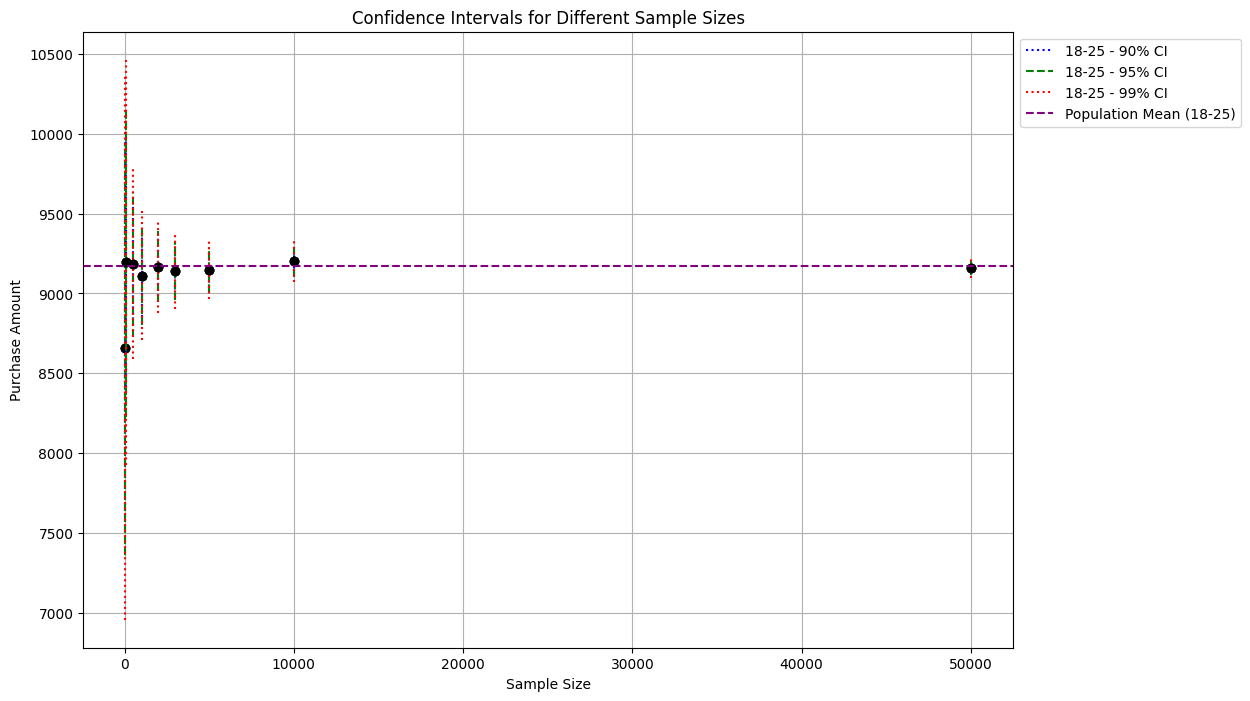

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,18-25,50,0.90,7569.789397,9740.850603,4666.591836,659.955746
1,18-25,50,0.95,7361.830506,9948.809494,4666.591836,659.955746
2,18-25,50,0.99,6955.386649,10355.253351,4666.591836,659.955746
3,18-25,100,0.90,8382.701773,10005.598227,4933.254933,493.325493
4,18-25,100,0.95,8227.249801,10161.050199,4933.254933,493.325493
5,18-25,100,0.99,7923.427738,10464.872262,4933.254933,493.325493
6,18-25,500,0.90,8803.144711,9564.691289,5176.356991,231.493722
7,18-25,500,0.95,8730.198642,9637.637358,5176.356991,231.493722
8,18-25,500,0.99,8587.629687,9780.206313,5176.356991,231.493722
9,18-25,1000,0.90,8852.985003,9371.892997,4988.076539,157.736830


In [52]:
# Age group 18 - 25
plot_category_CIs([CI_dict_age25], ['18-25'], [population_mean_age25], conf_level_colors, linestyle)

- We can say with 99% confidence that the range of avg purchase amount spent by the customers belonging to the age group 18-25 is 9098.95 -	9215.18
- We see that as the number of samples increase, the standard error descreases which establishes that our confidence intervals are more reliable.
- The CI is very narrow which indicates a smaller variability.
- We see the Standard Deviation fluctuates across the number of samples. This could be because the samples drawn has a wider spread of purchase amounts as we increase the number of samples.
- At larger sample numbers, Standard deviation starts to stabilize and we see an accurate representation of the population.

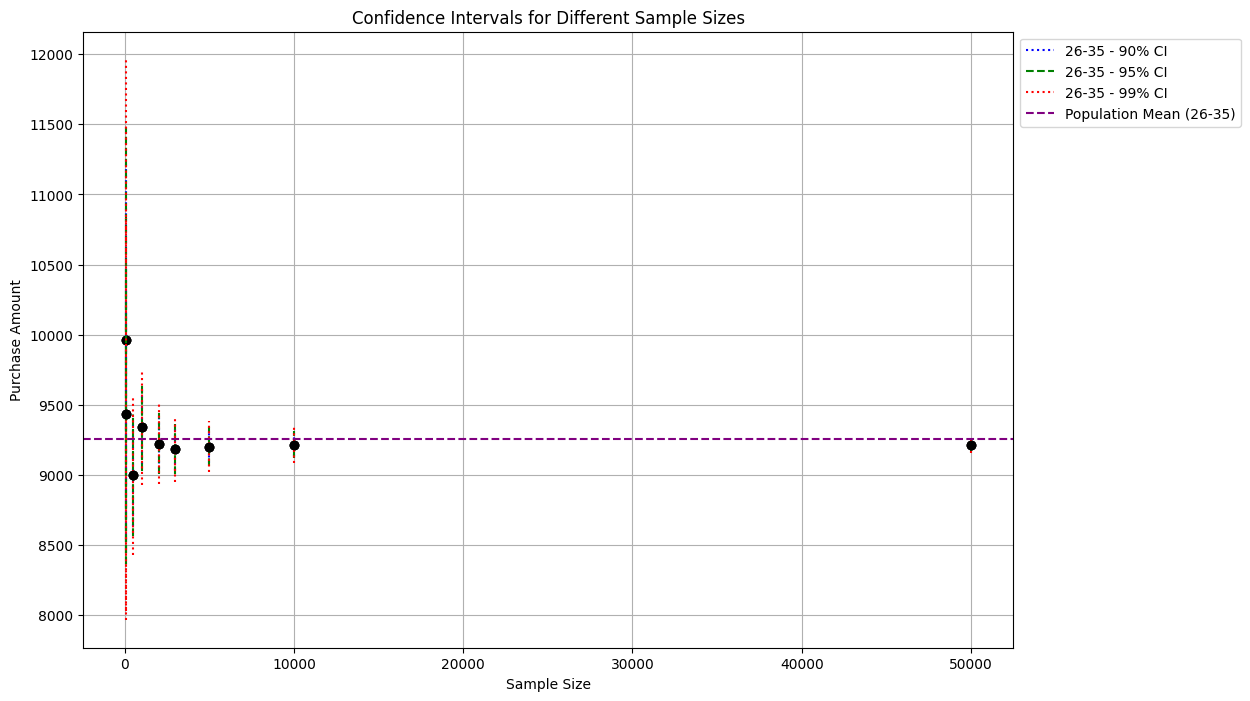

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,26-35,50,0.90,8689.157183,11238.882817,5480.512845,775.061559
1,26-35,50,0.95,8444.927258,11483.112742,5480.512845,775.061559
2,26-35,50,0.99,7967.593723,11960.446277,5480.512845,775.061559
3,26-35,100,0.90,8537.319251,10327.460749,5441.643771,544.164377
4,26-35,100,0.95,8365.847419,10498.932581,5441.643771,544.164377
5,26-35,100,0.99,8030.715452,10834.064548,5441.643771,544.164377
6,26-35,500,0.90,8632.659230,9363.864770,4970.123986,222.270702
7,26-35,500,0.95,8562.619430,9433.904570,4970.123986,222.270702
8,26-35,500,0.99,8425.730613,9570.793387,4970.123986,222.270702
9,26-35,1000,0.90,9077.182427,9602.883573,5053.376679,159.801802


In [53]:
# Age group 26 - 35, 36 - 45, 45-50, 50 - 55, 55+
plot_category_CIs([CI_dict_age35], ['26-35'], [population_mean_age35], conf_level_colors, linestyle)

This is the age group with the highest population size, and interestingly, it has relatively narrow confidence intervals even at smaller sample sizes. This suggests that the purchase behaviors in this group are somewhat homogeneous.

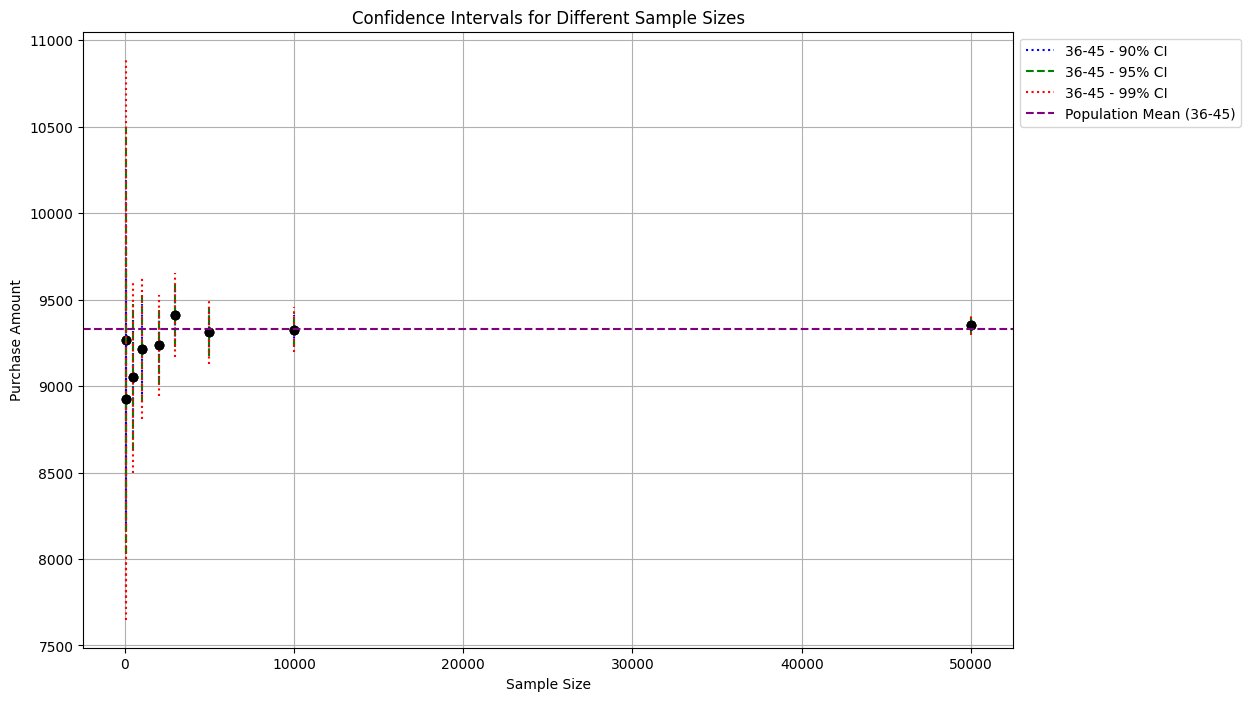

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,36-45,50,0.90,8234.030976,10301.489024,4443.901823,628.462623
1,36-45,50,0.95,8035.995894,10499.524106,4443.901823,628.462623
2,36-45,50,0.99,7648.947560,10886.572440,4443.901823,628.462623
3,36-45,100,0.90,8172.664005,9673.915995,4563.482018,456.348202
4,36-45,100,0.95,8028.863960,9817.716040,4563.482018,456.348202
5,36-45,100,0.99,7747.814929,10098.765071,4563.482018,456.348202
6,36-45,500,0.90,8698.154436,9406.241564,4812.984350,215.243204
7,36-45,500,0.95,8630.329073,9474.066927,4812.984350,215.243204
8,36-45,500,0.99,8497.768249,9606.627751,4812.984350,215.243204
9,36-45,1000,0.90,8955.357846,9477.152154,5015.821641,158.614207


In [54]:
plot_category_CIs([CI_dict_age45], ['36-45'], [population_mean_age45], conf_level_colors, linestyle)

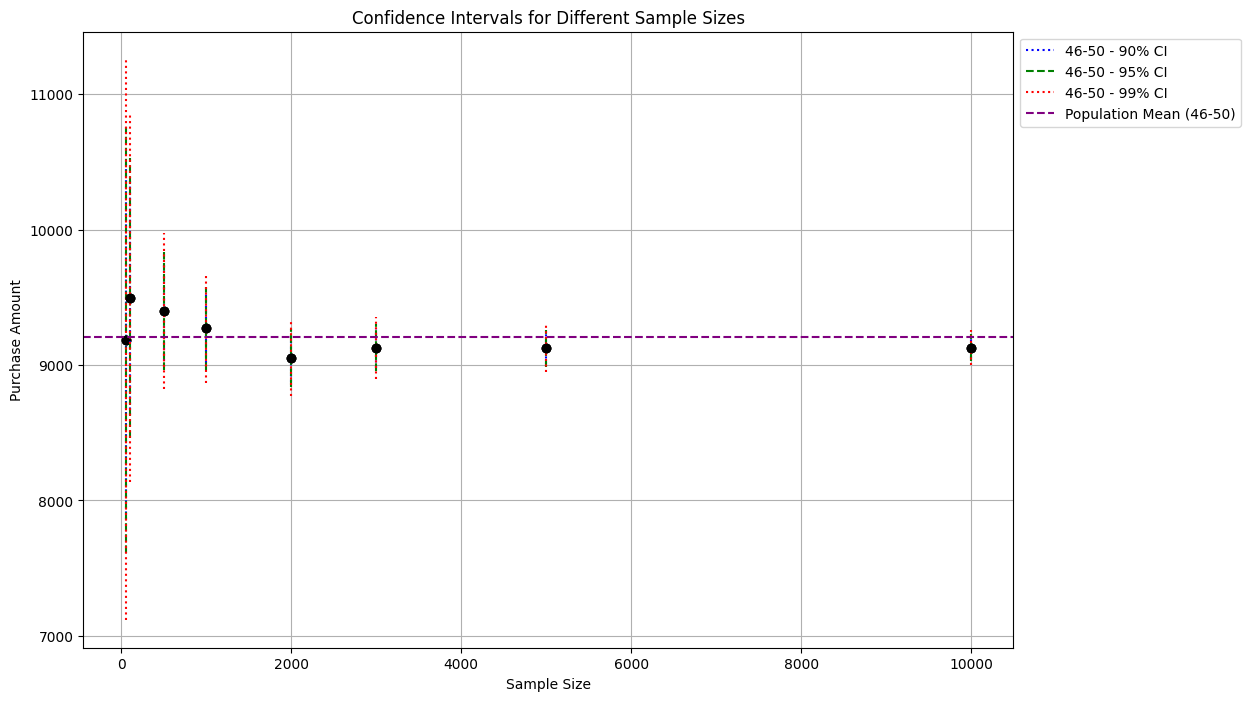

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,46-50,50,0.90,7866.271292,10507.528708,5677.256017,802.885246
1,46-50,50,0.95,7613.273835,10760.526165,5677.256017,802.885246
2,46-50,50,0.99,7118.804657,11254.995343,5677.256017,802.885246
3,46-50,100,0.90,8628.131875,10364.248125,5277.418677,527.741868
4,46-50,100,0.95,8461.834946,10530.545054,5277.418677,527.741868
5,46-50,100,0.99,8136.817032,10855.562968,5277.418677,527.741868
6,46-50,500,0.90,9033.244611,9767.059389,4987.859399,223.063854
7,46-50,500,0.95,8962.954881,9837.349119,4987.859399,223.063854
8,46-50,500,0.99,8825.577589,9974.726411,4987.859399,223.063854
9,46-50,1000,0.90,9012.871001,9528.176999,4953.451848,156.641901


In [55]:
plot_category_CIs([CI_dict_age50], ['46-50'], [population_mean_age50], conf_level_colors, linestyle)


For Age Groups 36-45 & 46-50: These groups have relatively moderate variability in purchase amounts, and their confidence intervals are neither too wide nor too narrow.

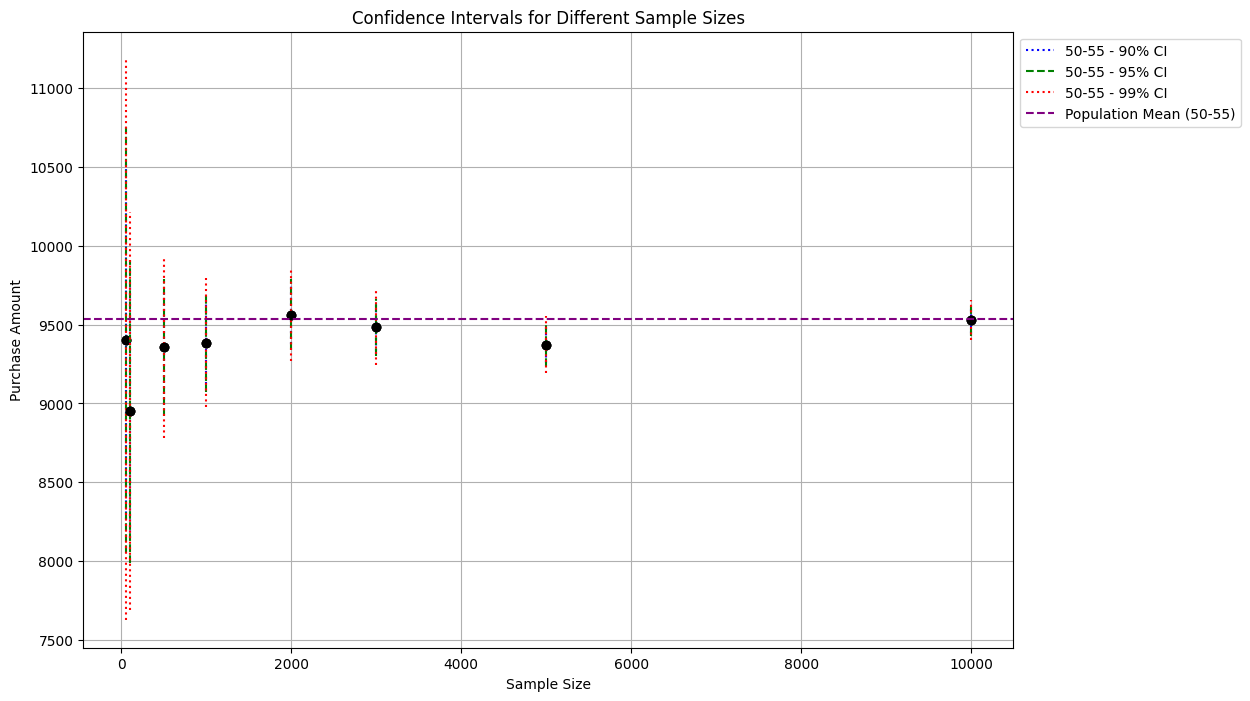

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,50-55,50,0.90,8269.690786,10539.069214,4877.919985,689.842060
1,50-55,50,0.95,8052.314407,10756.445593,4877.919985,689.842060
2,50-55,50,0.99,7627.464607,11181.295393,4877.919985,689.842060
3,50-55,100,0.90,8144.269340,9756.910660,4902.081539,490.208154
4,50-55,100,0.95,7989.799673,9911.380327,4902.081539,490.208154
5,50-55,100,0.99,7687.897472,10213.282528,4902.081539,490.208154
6,50-55,500,0.90,8989.865266,9720.774734,4968.111534,222.180702
7,50-55,500,0.95,8919.853826,9790.786174,4968.111534,222.180702
8,50-55,500,0.99,8783.020437,9927.619563,4968.111534,222.180702
9,50-55,1000,0.90,9123.185811,9645.310189,5018.994481,158.714541


In [56]:
plot_category_CIs([CI_dict_age55], ['50-55'], [population_mean_age55], conf_level_colors, linestyle)


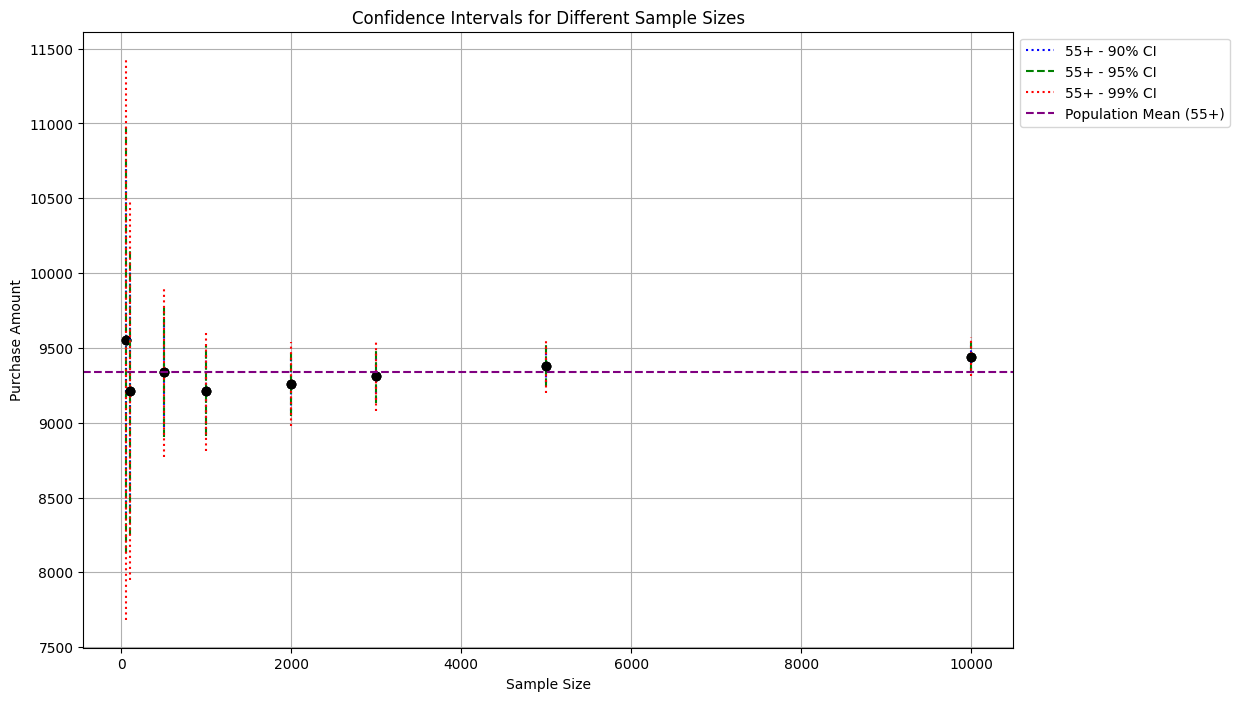

,Category,Sample Size,Confidence Level,Lower Bound,Upper Bound,Std. Deviation,Std. Error
0,55+,50,0.90,8359.842049,10749.437951,5136.321672,726.385577
1,55+,50,0.95,8130.950430,10978.329570,5136.321672,726.385577
2,55+,50,0.99,7683.594745,11425.685255,5136.321672,726.385577
3,55+,100,0.90,8405.862483,10018.357517,4901.636863,490.163686
4,55+,100,0.95,8251.406828,10172.813172,4901.636863,490.163686
5,55+,100,0.99,7949.532013,10474.687987,4901.636863,490.163686
6,55+,500,0.90,8974.142954,9700.809046,4939.268618,220.890808
7,55+,500,0.95,8904.537972,9770.414028,4939.268618,220.890808
8,55+,500,0.99,8768.498984,9906.453016,4939.268618,220.890808
9,55+,1000,0.90,8956.944583,9466.669417,4899.802121,154.945348


In [57]:
plot_category_CIs([CI_dict_age90], ['55+'], [population_mean_age90], conf_level_colors, linestyle)


For Age Groups 51-55 & 55+: These groups, having smaller population sizes, exhibit wider confidence intervals, indicating higher uncertainty in the estimates. However, we can observe that increasing the sample size does help in reducing the width of the confidence intervals, thus increasing the reliability of the estimates.

### Insights:
- The age groups 0-17 and 26-35 appear to have more homogeneous purchase behaviors compared to other groups, which is reflected in their narrower confidence intervals.
- Increasing the sample size significantly improves the precision of the average purchase amount estimates for all age groups, but it is especially beneficial for age groups with smaller population sizes or higher variability in purchase behaviors.

### Recommendations:

- Considering the distinct purchase behaviors observed across different age groups, Walmart can develop targeted marketing strategies for each group. For instance, they can design special discount offers for the 0-17 and 26-35 age groups, given their homogeneous purchase behaviors.
- For age groups like 18-25 and 55+, which have higher variability in purchase behaviors, it can be beneficial to conduct further analysis to understand the underlying factors causing this variability and tailor strategies accordingly.

In [58]:
# Calculating the 95% confidence interval for the average purchase amount in different occupation groups

conf_level = .95
occupation_groups = dset['Occupation'].unique()
conf_intervals_occupation = {}
z_score = norm.ppf((1 + conf_level) / 2)
for occupation_group in occupation_groups:
    occupation_group_data = dset[dset['Occupation'] == occupation_group]['Purchase']
    mean_purchase_occupation_group = occupation_group_data.mean()
    std_dev_purchase_occupation_group = occupation_group_data.std()
    n_occupation_group = len(occupation_group_data)
    std_err_occupation_group = std_dev_purchase_occupation_group / np.sqrt(n_occupation_group)
    margin_of_error_occupation_group = z_score * std_err_occupation_group

    conf_intervals_occupation[occupation_group] = ((mean_purchase_occupation_group - margin_of_error_occupation_group).round(2), (mean_purchase_occupation_group + margin_of_error_occupation_group).round(2))

conf_intervals_occupation


{'10': (8871.03, 9047.68),
 '16': (9332.99, 9455.94),
 '15': (9688.47, 9869.31),
 '7': (9384.73, 9466.72),
 '20': (8783.86, 8889.13),
 '9': (8522.76, 8752.73),
 '1': (8909.65, 8996.74),
 '12': (9739.58, 9853.7),
 '17': (9771.16, 9871.79),
 '0': (9087.5, 9161.35),
 '3': (9104.81, 9252.37),
 '4': (9177.22, 9250.74),
 '11': (9120.91, 9306.78),
 '8': (9287.51, 9777.67),
 '19': (8603.57, 8817.68),
 '2': (8893.11, 9011.85),
 '18': (9049.53, 9289.79),
 '5': (9243.89, 9422.41),
 '14': (9440.58, 9560.83),
 '13': (9196.21, 9416.49),
 '6': (9188.0, 9325.08)}

In [59]:
# Calculating the 95% confidence interval for the average spending of customers based on the number of years they have stayed in the current city

stay_years = dset['Stay_In_Current_City_Years'].unique()
conf_intervals_stay_years = {}

for stay_year in stay_years:
    stay_year_data = dset[dset['Stay_In_Current_City_Years'] == stay_year]['Purchase']
    mean_purchase_stay_year = stay_year_data.mean()
    std_dev_purchase_stay_year = stay_year_data.std()

    n_stay_year = len(stay_year_data)
    std_err_stay_year = std_dev_purchase_stay_year / np.sqrt(n_stay_year)
    margin_of_error_stay_year = z_score * std_err_stay_year
    conf_intervals_stay_years[stay_year] = ((mean_purchase_stay_year - margin_of_error_stay_year).round(2), (mean_purchase_stay_year + margin_of_error_stay_year).round(2))
conf_intervals_stay_years


{'2': (9289.45, 9351.41),
 '4+': (9241.81, 9309.38),
 '3': (9255.03, 9318.78),
 '1': (9227.76, 9272.53),
 '0': (9144.22, 9215.94)}

In [60]:
# Calculating the 95% confidence interval for the average spending in different product categories

product_categories = dset['Product_Category'].unique()
conf_intervals_product_categories = {}

for product_category in product_categories:
    product_category_data = dset[dset['Product_Category'] == product_category]['Purchase']
    mean_purchase_product_category = product_category_data.mean()
    std_dev_purchase_product_category = product_category_data.std()
    n_product_category = len(product_category_data)
    std_err_product_category = std_dev_purchase_product_category / np.sqrt(n_product_category)
    margin_of_error_product_category = z_score * std_err_product_category
    conf_intervals_product_categories[product_category] = ((mean_purchase_product_category - margin_of_error_product_category).round(2), (mean_purchase_product_category + margin_of_error_product_category).round(2))
conf_intervals_product_categories


{3: (10057.77, 10135.65),
 1: (13583.73, 13628.71),
 12: (1339.55, 1362.17),
 8: (7487.27, 7510.65),
 5: (6230.46, 6249.72),
 4: (2314.97, 2344.35),
 2: (11206.63, 11297.24),
 6: (15783.52, 15893.43),
 14: (12937.27, 13345.98),
 11: (4662.19, 4708.35),
 13: (717.57, 727.23),
 15: (14652.55, 14908.35),
 7: (16231.56, 16499.82),
 16: (14679.83, 14852.24),
 18: (2947.37, 2998.36),
 10: (19559.88, 19791.26),
 17: (9980.48, 10361.04),
 9: (15021.37, 16053.38),
 20: (363.99, 376.97),
 19: (36.22, 37.87)}

In [61]:
# 95% CI for the average purchase amount during Black Friday sales (entire dataset)
mean_purchase_overall = dset['Purchase'].mean()
std_dev_purchase_overall = dset['Purchase'].std()
sem_purchase_overall = std_dev_purchase_overall / np.sqrt(len(dset))
margin_of_error_overall = z_score * sem_purchase_overall
ci_purchase_overall = ((mean_purchase_overall - margin_of_error_overall).round(2), (mean_purchase_overall + margin_of_error_overall).round(2))

# 95% CI for the average transaction value for each user
user_avg_purchase = dset.groupby('User_ID')['Purchase'].mean()
mean_user_avg_purchase = user_avg_purchase.mean()
std_dev_user_avg_purchase = user_avg_purchase.std()
sem_user_avg_purchase = std_dev_user_avg_purchase / np.sqrt(len(user_avg_purchase))
margin_of_error_user_avg_purchase = z_score * sem_user_avg_purchase
ci_user_avg_purchase = ((mean_user_avg_purchase - margin_of_error_user_avg_purchase).round(2), (mean_user_avg_purchase + margin_of_error_user_avg_purchase).round(2))

# 95% CI for the average spending of customers who bought more than 10 products
more_than_10_products = dset['User_ID'].value_counts() > 10
users_with_more_than_10_products = more_than_10_products[more_than_10_products].index
dset_more_than_10 = dset[dset['User_ID'].isin(users_with_more_than_10_products)]
mean_purchase_more_than_10 = dset_more_than_10['Purchase'].mean()
std_dev_purchase_more_than_10 = dset_more_than_10['Purchase'].std()
sem_purchase_more_than_10 = std_dev_purchase_more_than_10 / np.sqrt(len(dset_more_than_10))
margin_of_error_more_than_10 = z_score * sem_purchase_more_than_10
ci_purchase_more_than_10 = ((mean_purchase_more_than_10 - margin_of_error_more_than_10).round(2), (mean_purchase_more_than_10 + margin_of_error_more_than_10).round(2))

ci_purchase_overall, ci_user_avg_purchase, ci_purchase_more_than_10

((9250.69, 9277.24), (9520.57, 9617.11), (9250.92, 9277.49))

---

### Some questions
1. The range in which the average purchase amount of male customers is
- Range of males avg purchase amount would be within 9403.15 and 9520.86 in USD  

2. The range in which the average purchase amount of female customers is
- Range of females avg purchase amount would be within 8699.44 and 8809.60 in USD

3. The average spending of customers in different age groups (e.g., 18-25, 26-35) with a certain level of confidence?
  - 0 - 17  : 8811.62 - 9076.15
  - 18 - 25 : 9098.95 - 9215.18
  - 26 - 35 : 9154.97 -	9270.06
  - 36 - 45 : 9294.75 -	9410.53
  - 46 - 50 : 9002.85 - 9255.83
  - 51 - 55 : 9399.49 -	9659.48
  - 55+     : 9312.94 - 9571.94

4. The probable range of the average spending of married customers versus unmarried customers
  - Unmarried : 9271.71 - 9308.88
  - Married : 9236.62 - 9273.56

5. The average purchase amount for different occupation groups
- Occupation '0': (9087.5, 9161.35),
- Occupation '1': (8909.65, 8996.74),
- Occupation '10': (8871.03, 9047.68),
- Occupation '11': (9120.91, 9306.78),
- Occupation '12': (9739.58, 9853.7),
- Occupation '13': (9196.21, 9416.49),
- Occupation '14': (9440.58, 9560.83),
- Occupation '15': (9688.47, 9869.31),
- Occupation '16': (9332.99, 9455.94),
- Occupation '17': (9771.16, 9871.79),
- Occupation '18': (9049.53, 9289.79),
- Occupation '19': (8603.57, 8817.68),
- Occupation '2': (8893.11, 9011.85),
- Occupation '20': (8783.86, 8889.13),
- Occupation '3': (9104.81, 9252.37),
- Occupation '4': (9177.22, 9250.74),
- Occupation '5': (9243.89, 9422.41),
- Occupation '6': (9188.0, 9325.08)
- Occupation '7': (9384.73, 9466.72),
- Occupation '8': (9287.51, 9777.67),
- Occupation '9': (8522.76, 8752.73),

6. The range in which the average spending of customers from different city categories (A, B, C) is
- City A: 8868.80 - 8982.03
- City B: 9086.54 - 9200.82
- City C: 9654.21 - 9773.70

7. The average spending of customers based on the number of years they have stayed in the current city
- Stay Year '0': (9144.22, 9215.94)
- Stay Year '1': (9227.76, 9272.53),
- Stay Year '2': (9289.45, 9351.41),
- Stay Year '3': (9255.03, 9318.78),
- Stay Year '4+': (9241.81, 9309.38),  

8. Confidence interval for the average spending in different product categories
- Product Category 10: (19559.88, 19791.26),
- Product Category 11: (4662.19, 4708.35),
- Product Category 12: (1339.55, 1362.17),
- Product Category 13: (717.57, 727.23),
- Product Category 14: (12937.27, 13345.98),
- Product Category 15: (14652.55, 14908.35),
- Product Category 16: (14679.83, 14852.24),
- Product Category 17: (9980.48, 10361.04),
- Product Category 18: (2947.37, 2998.36),
- Product Category 19: (36.22, 37.87)
- Product Category 1: (13583.73, 13628.71),
- Product Category 20: (363.99, 376.97),
- Product Category 2: (11206.63, 11297.24),
- Product Category 3: (10057.77, 10135.65),
- Product Category 4: (2314.97, 2344.35),
- Product Category 5: (6230.46, 6249.72),
- Product Category 6: (15783.52, 15893.43),
- Product Category 7: (16231.56, 16499.82),
- Product Category 8: (7487.27, 7510.65),
- Product Category 9: (15021.37, 16053.38),  

9. The range in which the average purchase amount during Black Friday sales is
- Range : (9250.69, 9277.24)

10. The average transaction value for each user with a certain level of confidence?
- Range : (9520.57, 9617.11)

11. The range of average spending of customers who bought more than 10 products
- Range: (9250.92, 9277.49)

---

## Final Insights:
- A significant portion of the customer base falls in the age group of 26-35, highlighting a dominant young and middle-aged demographic.
- Male customers outnumber female customers across different age groups and city categories, showing a clear gender disparity in the customer base.
- City category B is the most favored shopping location, followed by C and A. This trend is seen across various age groups, indicating a general preference for the city category B.
- There is a diverse range of occupations seen in older age groups, pointing to varied shopping needs based on occupation.
- The plots for variables such as age and occupation present a clear view of the distribution of customers in various categories, with the age group 26-35 and occupation 4 being the most common.
- A relatively uniform distribution is observed, illustrating a balanced customer base comprising both new and long-term city dwellers.
- The dataset contains a fairly balanced representation of both married and unmarried individuals, signifying diverse shopping needs and preferences.
- A few product categories enjoy a higher preference among customers, indicating popular choices and potential bestsellers.
- Different age groups exhibit varied average purchase values, with middle-aged customers generally spending more.
- Male customers tend to have a higher average purchase value compared to female customers.
- Different city categories showcase different spending patterns, with city category C leading in terms of average purchase value.
- Marital status seems to affect the purchase behavior to an extent, with subtle differences in spending patterns between married and unmarried individuals.
- The 26-35 age group has the highest number of customers for both genders, indicating a dominant customer segment that can be targeted for maximum outreach.
- The diversity in occupation increases with age, suggesting a broad spectrum of professional backgrounds in the older age groups.
- The younger demographic (26-35 age group) is particularly pronounced in city category C, hinting at a city with a youthful vibe.
- The CLT analysis revealed that as we increase the sample size, the width of the confidence interval decreases, giving us a more precise estimate of the population parameter. Larger sample sizes lead to more reliable - estimates, which is a fundamental principle backed by CLT.
- Using confidence intervals, it was observed that there is a divergence in the average purchase amounts between males and females, especially as the sample size increases. This indicates a statistically significant difference - in the spending patterns of the two groups, an insight gained through the application of CLT in forming confidence intervals.
- The confidence intervals for different age groups gave us a range of average spending for each group. It was observed that certain age groups tend to spend more compared to others, giving a valuable insight into the spending - habits of different demographics.

## Recommendations:
- Develop targeted marketing strategies for both genders.
- Create age-specific marketing strategies, with special attention to mature customers.
- Develop city-specific strategies and leverage higher spending patterns in category C.
- Introduce loyalty programs and engagement programs for new residents.
- Develop targeted marketing strategies for dominant age groups and foster engagement with younger and older demographics.
- Craft strategies to attract more female shoppers and focus on catering to preferences in city category B.
- Develop strategies to cater to young adults and to engage elderly customers in city category C.
- Introduce occupation-specific offers and products catering to young adults.
- Offer products that cater to the diverse needs of the 26-35 age group and develop family-centric offers for older age groups.
- Introduce occupation-specific promotions and a diversified product portfolio in city category B.
- Develop tailored marketing strategies that cater to various occupational groups.
- Design targeted marketing campaigns and offer a diverse product portfolio to cater to different marital statuses.
- Develop gender-specific marketing strategies and analyze other demographic factors for nuanced insights.
- Launch marketing campaigns to promote specific product categories to respective age groups.
- Analyze the attributes of top-selling products for targeted marketing campaigns.
- Tailored marketing strategies could be employed to cater to male customers while also focusing on attracting more female customers through targeted promotions and offers.
- Introduce products and services that resonate with the young demographic, including tech gadgets, youthful apparel, etc.
- Focus on boosting the sales of popular categories through targeted marketing while also exploring ways to elevate less popular categories.
- Design promotional campaigns that cater to middle-aged customers, who tend to spend more, while also devising strategies to engage younger and older customers effectively.
- Develop gender-specific marketing strategies to cater to the distinct preferences of male and female customers.
- Create city-specific strategies to tap into the unique preferences of customers in different city categories, leveraging the high spending potential in city category C.
- Walmart can perform pilot tests on a sample of customers to predict the response of the entire customer base.
- The insight about different spending patterns among males and females, as well as different age groups, can be utilized in segmented marketing strategies. Marketing campaigns can be designed to target the specific preferences - and shopping behaviors of different groups, enhancing the effectiveness of marketing efforts.
- Insights derived from confidence intervals can be used to develop dynamic pricing strategies. For instance, products favored by higher-spending age groups can be priced at a premium, while offering discounts and offers on products popular among lower-spending groups to encourage purchase.